In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("/home/scipyuser/AKHS/labeled_data.csv")

In [5]:
df = df.drop('Unnamed: 0', axis=1)

In [6]:
df.head(3)

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...


In [7]:
df.columns

Index(['count', 'hate_speech', 'offensive_language', 'neither', 'class',
       'tweet'],
      dtype='object')

In [8]:
df.describe()

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

In [11]:
df.groupby("class").describe()

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

In [ ]:
#df.groupby("class").describe()["class"==0]
sum(df["class"]==0)

In [ ]:
df["class"].value_counts()

In [ ]:
def percentage_class(idx):
    Percentage = 100 * float(sum(df["class"]==idx))/float(len(df["class"]))
    return Percentage


In [ ]:
print("the percenatge of '0' class", percentage_class(0))
print("the percenatge of '1' class", percentage_class(1))
print("the percenatge of '2' class", percentage_class(2))

In [ ]:
#ploting percentage of each class
df["class"].value_counts().plot(kind='pie',autopct='%1.1f%%')

Finding out the Maximum length tweet



In [ ]:
df['length'] = df['tweet'].apply(len)
df.head()

In [ ]:
df['length'].plot(bins=50, kind='hist')

#Feature generation

Here copying the data from **df** to **dataF** and creating new variable with same data

In [12]:
#copying data from original variable to another varible.

dataF = df.copy()

In [10]:
#Viewing top 3 rows in the data set

dataF.head(3)

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...


In [18]:
dataF.head(5)

,count,hate_speech,offensive_language,neither,class,tweet,length
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137


In [19]:
# Cleaning the texts
import re
import nltk
from nltk.corpus import stopwords            ## it will check stop words present in data
from nltk.stem.porter import PorterStemmer   ## it will use for stemmming the words
from nltk.stem import WordNetLemmatizer
from nltk.tag import StanfordPOSTagger

In [20]:
# !pip install contractions

In [21]:
import contractions
def con(words):
    return [contractions.fix(word) for word in words.split()]    #For expanding Contractions

ModuleNotFoundError: No module named 'contractions'

In [ ]:
# dataF['Contractions']=dataF['tweet'].apply(lambda x: con(x))

In [ ]:
dataF.head()

In [24]:
#!pip install TextBlob
#from textblob import TextBlob

In [25]:
#!pip install gingerit

In [26]:
#from gingerit.gingerit import GingerIt
#parser = GingerIt()
#tweet=parser.parse(dataF['tweet'][23])
#tweet

In [27]:
#blob=TextBlob(dataF['tweet'][23])
#blob.correct()

In [28]:
# Expanding whatsapp language slangs

import csv
import re

def translator(user_string):
    user_string = user_string.split(" ")
    j = 0
    for _str in user_string:
        # File path which consists of Abbreviations.
        fileName = "/home/k8user/Akhil_HateSpeech/Preprocessing/sms_slang_translator/slang.txt"
        accessMode = "r"
        with open(fileName, accessMode) as myCSVfile:
            # Reading file as CSV with delimiter as "=", so that abbreviation are stored in row[0] and phrases in row[1]
            dataFromFile = csv.reader(myCSVfile, delimiter="=")
            # Removing Special Characters.
            _str = re.sub('[^a-zA-Z0-9-_.]', '', _str)
            for row in dataFromFile:
                # Check if selected word matches short forms[LHS] in text file.
                if str(_str).upper() == row[0]:
                    # If match found replace it with its appropriate phrase in text file.
                    user_string[j] = row[1]
            myCSVfile.close()
        j = j + 1
    # Replacing commas with spaces for final output.
    return ' '.join(user_string)

In [29]:
dataF['ExpandedSlangs']=dataF['tweet'].apply(lambda x: translator(x)) 

In [30]:
dataF.head()

,count,hate_speech,offensive_language,neither,class,tweet,length,ExpandedSlangs
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85,!!!!! RT @mleew17: boy Thats cold...tyga Down ...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120,!!!!!!! RT @UrKindOfBrand Dog RT @80sbaby4life...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [31]:
dataF['Preprocessed_Initial']=dataF['ExpandedSlangs'].apply(lambda x: con(x)) #Contractions for expanded slangs

In [32]:
dataF.head()

,count,hate_speech,offensive_language,neither,class,tweet,length,ExpandedSlangs,Preprocessed_Initial
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140,!!! RT @mayasolovely: As a woman you shouldn't...,"[!!!, RT, @mayasolovely:, As, a, woman, you, s..."
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85,!!!!! RT @mleew17: boy Thats cold...tyga Down ...,"[!!!!!, RT, @mleew17:, boy, That Is, cold...ty..."
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120,!!!!!!! RT @UrKindOfBrand Dog RT @80sbaby4life...,"[!!!!!!!, RT, @UrKindOfBrand, Dog, RT, @80sbab..."
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,"[!!!!!!!!!, RT, @C_G_Anderson:, @viva_based, s..."
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,"[!!!!!!!!!!!!!, RT, @ShenikaRoberts:, The, shi..."


In [33]:
# import nltk
# nltk.download('stopwords')

In [34]:
# import nltk
# nltk.download('wordnet')

In [35]:
# import nltk
# nltk.download('punkt')

In [36]:
# Preprocessing the tweets.

import nltk
from nltk.tokenize import RegexpTokenizer,word_tokenize
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
 
def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    #for text in sentence:
    #  if text in ['html','www','http','https','rt']:
    #sentence= [sentence.replace(w,'') for w in sentence if w in ['html','www','http','https','rt']]
    sentence=sentence.replace('rt',"")
    sentence=sentence.replace('www',"")
    sentence=sentence.replace('http',"")
    sentence=sentence.replace('https',"")
    sentence=sentence.replace('html',"")
    sentence=sentence.replace('*',"")
    sentence=sentence.replace('#',"")
    cleanr = re.compile('<.?>')
    cleantext1 = re.sub(cleanr, '', sentence)
    cleantext = re.sub('@[^\s]+','',cleantext1)
#     rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', cleantext)
    tokenizer = RegexpTokenizer(r'\w+')
    #tokenizer = RegexpTokenizer("[\w']+")
    tokens = tokenizer.tokenize(rem_num)
    #tokens = word_tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2] # if not w in stopwords.words('english')]
    #stem_words=[stemmer.stem(w) for w in filtered_words]
    #lemma_words=[lemmatizer.lemmatize(w) for w in filtered_words]
    return " ".join(filtered_words)

In [37]:
dataF['PreprocessedTweet']=dataF['Preprocessed_Initial'].map(lambda s:preprocess(s))
#dataF['tweet_prepro'] = dataF['tweet'].apply(lambda x: preprocess(x))
#dataF['tweet_prepro'].tail()

In [38]:
dataF.head()

,count,hate_speech,offensive_language,neither,class,tweet,length,ExpandedSlangs,Preprocessed_Initial,PreprocessedTweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140,!!! RT @mayasolovely: As a woman you shouldn't...,"[!!!, RT, @mayasolovely:, As, a, woman, you, s...",woman you should not complain about cleaning y...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85,!!!!! RT @mleew17: boy Thats cold...tyga Down ...,"[!!!!!, RT, @mleew17:, boy, That Is, cold...ty...",boy that cold tyga down bad for cuffin that ho...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120,!!!!!!! RT @UrKindOfBrand Dog RT @80sbaby4life...,"[!!!!!!!, RT, @UrKindOfBrand, Dog, RT, @80sbab...",dog you ever fuck bitch and she sta cry you co...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,"[!!!!!!!!!, RT, @C_G_Anderson:, @viva_based, s...",she look like tranny
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,"[!!!!!!!!!!!!!, RT, @ShenikaRoberts:, The, shi...",the shit you hear about might true might faker...


In [39]:
def tokenize(text):
    tokens = re.split(" ",text) 
    return tokens

In [40]:
dataF['final_tweet_tokens'] = dataF['PreprocessedTweet'].apply(lambda x: tokenize(x))

In [41]:
dataF.head()

,count,hate_speech,offensive_language,neither,class,tweet,length,ExpandedSlangs,Preprocessed_Initial,PreprocessedTweet,final_tweet_tokens
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140,!!! RT @mayasolovely: As a woman you shouldn't...,"[!!!, RT, @mayasolovely:, As, a, woman, you, s...",woman you should not complain about cleaning y...,"[woman, you, should, not, complain, about, cle..."
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85,!!!!! RT @mleew17: boy Thats cold...tyga Down ...,"[!!!!!, RT, @mleew17:, boy, That Is, cold...ty...",boy that cold tyga down bad for cuffin that ho...,"[boy, that, cold, tyga, down, bad, for, cuffin..."
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120,!!!!!!! RT @UrKindOfBrand Dog RT @80sbaby4life...,"[!!!!!!!, RT, @UrKindOfBrand, Dog, RT, @80sbab...",dog you ever fuck bitch and she sta cry you co...,"[dog, you, ever, fuck, bitch, and, she, sta, c..."
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,"[!!!!!!!!!, RT, @C_G_Anderson:, @viva_based, s...",she look like tranny,"[she, look, like, tranny]"
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,"[!!!!!!!!!!!!!, RT, @ShenikaRoberts:, The, shi...",the shit you hear about might true might faker...,"[the, shit, you, hear, about, might, true, mig..."


In [42]:
dataF['PreprocessedTweet'].head()

0    woman you should not complain about cleaning y...
1    boy that cold tyga down bad for cuffin that ho...
2    dog you ever fuck bitch and she sta cry you co...
3                                 she look like tranny
4    the shit you hear about might true might faker...
Name: PreprocessedTweet, dtype: object

In [43]:
# !pip install wordcloud

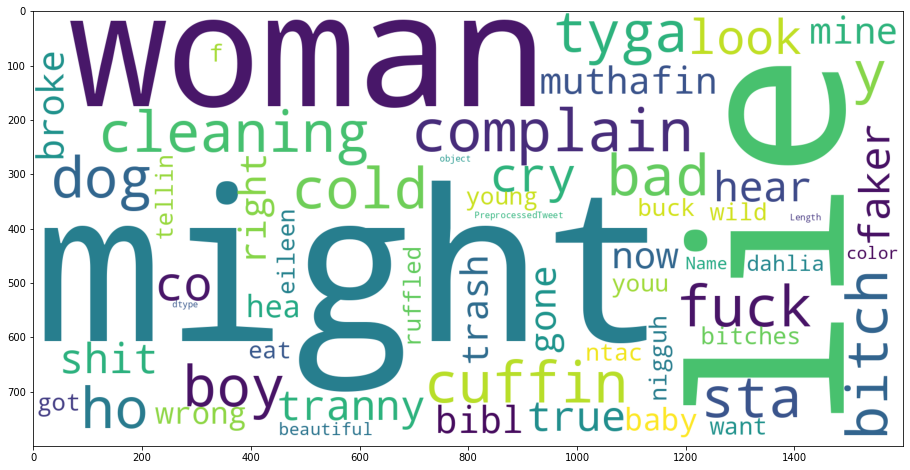

In [44]:
from wordcloud import WordCloud
word_c = WordCloud(collocations=False,background_color='white',mode='RGB',scale=4).generate(str(dataF['PreprocessedTweet']))
import matplotlib.pyplot as plt 
plt.figure(figsize=(18,8),facecolor='w')
plt.imshow(word_c);

In [45]:
def lemmatizing(words):
    lemmatizer =WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

In [46]:
dataF['LemmaWords']=dataF['final_tweet_tokens'].apply(lambda x: lemmatizing(x))

In [47]:
dataF.head()

,count,hate_speech,offensive_language,neither,class,tweet,length,ExpandedSlangs,Preprocessed_Initial,PreprocessedTweet,final_tweet_tokens,LemmaWords
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140,!!! RT @mayasolovely: As a woman you shouldn't...,"[!!!, RT, @mayasolovely:, As, a, woman, you, s...",woman you should not complain about cleaning y...,"[woman, you, should, not, complain, about, cle...","[woman, you, should, not, complain, about, cle..."
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85,!!!!! RT @mleew17: boy Thats cold...tyga Down ...,"[!!!!!, RT, @mleew17:, boy, That Is, cold...ty...",boy that cold tyga down bad for cuffin that ho...,"[boy, that, cold, tyga, down, bad, for, cuffin...","[boy, that, cold, tyga, down, bad, for, cuffin..."
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120,!!!!!!! RT @UrKindOfBrand Dog RT @80sbaby4life...,"[!!!!!!!, RT, @UrKindOfBrand, Dog, RT, @80sbab...",dog you ever fuck bitch and she sta cry you co...,"[dog, you, ever, fuck, bitch, and, she, sta, c...","[dog, you, ever, fuck, bitch, and, she, sta, c..."
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,"[!!!!!!!!!, RT, @C_G_Anderson:, @viva_based, s...",she look like tranny,"[she, look, like, tranny]","[she, look, like, tranny]"
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,"[!!!!!!!!!!!!!, RT, @ShenikaRoberts:, The, shi...",the shit you hear about might true might faker...,"[the, shit, you, hear, about, might, true, mig...","[the, shit, you, hear, about, might, true, mig..."


In [48]:
dataF['LemmaWords']

0        [woman, you, should, not, complain, about, cle...
1        [boy, that, cold, tyga, down, bad, for, cuffin...
2        [dog, you, ever, fuck, bitch, and, she, sta, c...
3                                [she, look, like, tranny]
4        [the, shit, you, hear, about, might, true, mig...
                               ...                        
24778    [you, muthafin, lie, right, his, trash, now, m...
24779    [you, have, gone, and, broke, the, wrong, hea,...
24780    [young, buck, want, eat, that, nigguh, like, a...
24781           [youu, got, wild, bitch, tellin, you, lie]
24782    [ruffled, ntac, eileen, dahlia, beautiful, col...
Name: LemmaWords, Length: 24783, dtype: object

In [49]:
# dataF.to_csv('Hate_spech_preprocessed.csv', index=False)

In [50]:
# !pip install keras

In [51]:
# !pip install tensorflow

In [52]:
# from keras.preprocessing.text import text_to_word_sequence

In [53]:
# dataF['KerasTokens']=dataF['PreprocessedTweet'].apply(text_to_word_sequence)

In [54]:
# dataF.head()

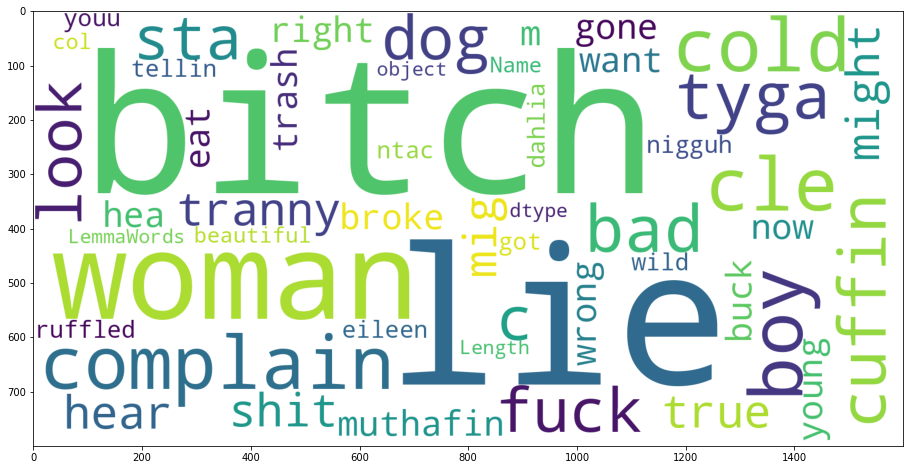

In [55]:
from wordcloud import WordCloud
word_c = WordCloud(collocations=False,background_color='white',mode='RGB',scale=4).generate(str(dataF['LemmaWords']))
import matplotlib.pyplot as plt 
plt.figure(figsize=(18,8),facecolor='w')
plt.imshow(word_c);

In [56]:
dataF['Lemma_Preprocessed']=dataF['LemmaWords'].map(lambda s:preprocess(s))

In [57]:
from sklearn.feature_extraction.text import CountVectorizer 

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [58]:
common_words = get_top_n_words(dataF['Lemma_Preprocessed'], 250)
top_words=[]
for word, freq in common_words:
    print(word, freq)
    top_words.append(word)

bitch 11466
you 9282
the 7340
not 5041
that 4492
hoe 4347
and 3993
are 3063
like 2837
pussy 2265
all 2186
this 2165
for 2131
out 2054
nigga 2020
with 1854
got 1602
fuck 1575
get 1545
your 1544
they 1499
but 1489
just 1471
about 1406
she 1371
have 1337
when 1332
these 1323
shit 1300
trash 1165
her 1154
what 1085
laughing 1007
want 1002
loud 1000
will 964
amp 930
them 917
some 902
know 861
off 818
can 817
one 762
love 755
who 729
how 717
girl 701
cannot 675
would 641
fucking 631
because 625
bird 608
make 601
now 596
look 588
say 578
why 577
from 575
going 574
bad 573
man 568
then 554
faggot 545
his 543
good 538
need 533
too 522
think 499
time 496
hate 487
see 480
still 479
back 477
only 461
day 458
let 452
never 447
people 427
really 426
did 424
there 418
real 417
right 403
even 391
white 390
being 388
said 381
here 378
laugh 378
come 375
more 368
over 362
had 361
dick 360
call 357
their 351
head 348
wit 346
down 345
been 343
life 342
than 341
tell 340
stop 336
talk 331
take 328
damn 327

In [59]:
most_common = pd.DataFrame(common_words,columns=['words', 'count'])
most_common.head()

,words,count
0,bitch,11466
1,you,9282
2,the,7340
3,not,5041
4,that,4492


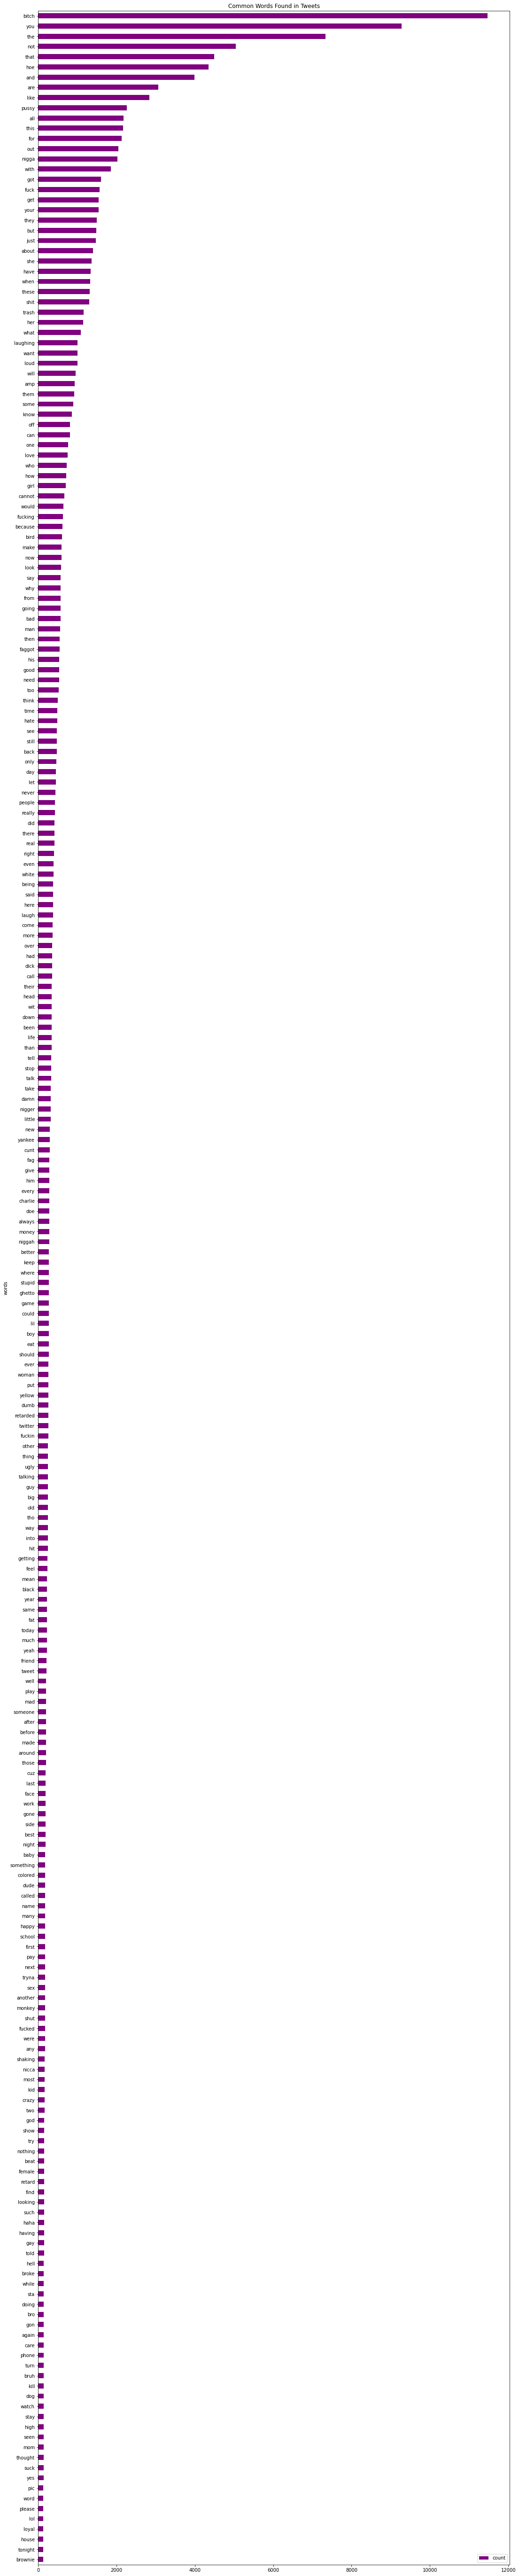

In [60]:
fig, ax = plt.subplots(figsize=(18, 100))

# Plot horizontal bar graph
most_common.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets")

plt.show()

# TF-IDF

In [61]:
# !pip install gensim

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim

In [73]:
tfidf_vectorizer = TfidfVectorizer(min_df=50, max_features=1000, stop_words=None,tokenizer=tokenize,analyzer='word')
tfidf = tfidf_vectorizer.fit_transform(dataF['PreprocessedTweet'])
tfidf.shape

(24783, 590)

In [66]:
# tfidf_vectorizer = TfidfVectorizer(min_df=50, max_features=1000, stop_words=None,tokenizer=tokenize,analyzer='word',ngram_range=(1,3),norm='l2')
# tfidf = tfidf_vectorizer.fit_transform(dataF['PreprocessedTweet'])
# tfidf.shape

In [85]:
tfidf_df = pd.read_csv("/home/k8user/Akhil_HateSpeech/Embeddings/TF-IDF/TF-IDF_features_names.csv")

In [78]:
# tfidf_df = pd.DataFrame(tfidf.toarray())

In [73]:
# labs = dataF['class']

In [74]:
# tfidf_df_labels = pd.concat([tfidf_df,labs],axis=1)

In [122]:
# tfidf_df_labels.to_csv("/home/k8user/Akhil_HateSpeech/Embeddings/TF-IDF/TF_IDF_Vectors_labels.csv",index= False)

In [75]:
# tfidf_df = tfidf_df.values

In [86]:
tfidf_df.head()

,about,act,acting,actually,after,again,ago,all,almost,already,...,yeah,year,years,yellow,yes,yet,you,young,your,yourself
0,0.196686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.229437,0.0,0.19333,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.296458,0.0,0.00000,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0
4,0.190471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.222187,0.0,0.00000,0.0


# Word2Vec

In [87]:
tokenized_tweet = dataF['PreprocessedTweet'].apply(lambda x: x.split()) # tokenizing 

In [88]:
%%time


model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            vector_size=1000, # desired no. of features/independent variables
            window=20, # context window size
            min_count=100, # Ignores all words with total frequency lower than 20.                                  
            sg = 0, # 1 for skip-gram model
            negative = 10, # for negative sampling
            workers= 32, # no.of cores
            seed = 34
) 

model_w2v.train(tokenized_tweet, total_examples= len(dataF['PreprocessedTweet']), epochs=20)

CPU times: user 25.4 s, sys: 122 ms, total: 25.5 s
Wall time: 4.35 s


(1921691, 5134880)

In [89]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError:  # handling the case where the token is not in vocabulary
            continue
    if count != 0:
        vec /= count
    return vec

In [90]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 1000)) 
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 1000 )
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(24783, 1000)

In [13]:
wordvec_df = pd.read_csv("/home/scipyuser/AKHS/word2vec_features_l.csv")

In [14]:
wordvec_df.drop('class.1',axis=1,inplace=True)

# Doc2Vec

In [78]:
#!pip install --upgrade pandas==0.25.0

In [79]:
!pip install tqdm

In [76]:
from tqdm import tqdm 
#tqdm.pandas(desc="progress-bar") 
# from gensim.models.doc2vec import LabeledSentence
from gensim.models.doc2vec import TaggedDocument

In [79]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(TaggedDocument(s, ["tweet_" + str(i)]))
    return output

labeled_tweets = add_label(tokenized_tweet) # label all the tweets

In [80]:
%%time 
model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model
                                  dm_mean=1, # dm_mean = 1 for using mean of the context word vectors
                                  vector_size=1000, # no. of desired features
                                  window=5, # width of the context window                                  
                                  negative=7, # if > 0 then negative sampling will be used
                                  min_count=5, # Ignores all words with total frequency lower than 5.                                  
                                  workers=32, # no. of cores                                  
                                  alpha=0.1, # learning rate                                  
                                  seed = 23, # for reproducibility
                                 ) 

model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])

model_d2v.train(labeled_tweets, total_examples= len(dataF['PreprocessedTweet']), epochs=15)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 24783/24783 [00:00<00:00, 4994591.39it/s]


CPU times: user 44 s, sys: 8.15 s, total: 52.2 s
Wall time: 28.5 s


In [81]:
docvec_arrays = np.zeros((len(tokenized_tweet), 1000)) 
for i in range(len(dataF)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,1000))    

docvec_df = pd.DataFrame(docvec_arrays) 
docvec_df.shape

(24783, 1000)

# LIWC

In [15]:
lw = pd.read_excel('LIWC2015 Results (HateSpeech)-Apr13-2022.xlsx')

In [16]:
lw.drop('Source (A)',axis=1,inplace=True)

In [17]:
lwc = lw.drop(0,axis=0)

In [18]:
lwc.index = wordvec_df.index

In [19]:
lwc.head()

,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,16,99.00,73.40,7.84,1.00,8.0,6.25,62.50,18.75,0.0,...,0.0,6.25,0.00,0.0,43.75,0.0,0.00,0.0,0.0,6.25
1,6,92.84,50.00,23.51,1.00,6.0,66.67,83.33,0.00,0.0,...,0.0,33.33,0.00,0.0,0.00,0.0,33.33,0.0,0.0,33.33
2,6,99.00,4.80,1.00,1.00,6.0,0.00,66.67,16.67,0.0,...,0.0,0.00,16.67,0.0,0.00,0.0,33.33,0.0,0.0,16.67
3,13,92.84,6.21,1.40,25.77,13.0,23.08,61.54,15.38,0.0,...,0.0,0.00,0.00,0.0,0.00,0.0,15.38,0.0,0.0,38.46
4,8,99.00,10.58,99.00,25.77,8.0,0.00,75.00,37.50,0.0,...,0.0,0.00,0.00,0.0,0.00,0.0,25.00,0.0,0.0,0.00


# Ablation

In [20]:
wv_liwc = pd.concat([wordvec_df,lwc],axis=1)

In [21]:
wv_liwc.shape

(24783, 683)

## Splitting the data

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wv_liwc.values, dataF['class'].values, \
                                                    stratify = dataF['class'].values,shuffle = True,\
                                                    random_state=1,test_size=0.3)

/home/scipyuser/anaconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return floored.astype(np.int)
/home/scipyuser/anaconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curre

In [23]:
#importing necessary librarys machine learning algorthms

from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# PNN algorithm not imported
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


#importing all necessary metrics
from sklearn.metrics import *


/home/scipyuser/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/home/scipyuser/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  meth

## Training LogisticRegression

In [24]:
tfidf_result_metrics_gds = []
t_test_tfidf_accuracy_gds = []

In [25]:
technique="W2V_LIWC"

In [30]:
#Define both cross-validation objects (inner & outer)

outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    
vali_scores = []
accuracy = []
micro_f1 = []
macro_f1 = []
cm_score = []

rac_precision=[]
rac_recall=[]
rac_f1score=[]
rac_support=[]

se_precision=[]
se_recall=[]
se_f1score=[]
se_support=[]

nei_precision=[]
nei_recall=[]
nei_f1score=[]
nei_support=[]

# precision_score = []
# specificity_score = []  
# sensitivity_score = []

#writing a loop for 10-fold cross-validation & parameter tuning
    
for k,(train, test) in enumerate(outer_cv.split(X_train, y_train)):
    
    LR_model = LogisticRegression(C=1000,max_iter=300,n_jobs=-1)
    
    # define gridsearch CV
    p_grid = {#'penalty': ['l1', 'l2'],
             'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
    
    clf = GridSearchCV(estimator = LR_model, param_grid=p_grid, scoring='f1_micro',
                       refit=True, n_jobs=20)
    # fitting model on parameter search
    gd_search = clf.fit(X_train[train], y_train[train])

    # Validating model which is trained parameter search "inner_cv".
    score = gd_search.score(X_train[test], y_train[test])
    vali_scores.append(score)

    # get the best performing model fit on the whole training set
    best_model = gd_search.best_estimator_
    
    best_param = gd_search.best_params_
    # evaluate model on the hold out dataset
    y_pred = best_model.predict(X_test)

    # model "accuracy score" from ground truth and predicted values 
    acc = accuracy_score(y_test, y_pred)
 
    # micro_F1, marco_F1 
    target_names=['Hate speech','Offensive laguage','Neither']
    report = classification_report(y_test, y_pred,target_names=target_names,output_dict=True)
    
    ### individual class metrics
    
    
    rac_precision.append(report['Hate speech']['precision'])
    rac_recall.append(report['Hate speech']['recall'])
    rac_f1score.append(report['Hate speech']['f1-score'])
    rac_support.append(report['Hate speech']['support'])
    
    se_precision.append(report['Offensive laguage']['precision'])
    se_recall.append(report['Offensive laguage']['recall'])
    se_f1score.append(report['Offensive laguage']['f1-score'])
    se_support.append(report['Offensive laguage']['support'])
    
    nei_precision.append(report['Neither']['precision'])
    nei_recall.append(report['Neither']['recall'])
    nei_f1score.append(report['Neither']['f1-score'])
    nei_support.append(report['Neither']['support'])
    
    
    # Since it is multiclass classification printing "micro_F1_score"
    micro_F1 = f1_score(y_test, y_pred, average='micro')

    # Since it is multiclass classification printing "macro_F1_score"
    macro_F1 = f1_score(y_test, y_pred, average='macro')

    # taking "confusion metrics" from true and predicted values
    cm = confusion_matrix(y_test, y_pred)               ## Confusion Matrix
    
    accuracy.append(acc)
    micro_f1.append(micro_F1)
    macro_f1.append(macro_F1)
    cm_score.append(cm)
          
    print('Fold:%2d, acc=%.3f, Val_Acc: %.3f, est=%.3f, cfg=%s' % (k+1,
                            acc, score, gd_search.best_score_, gd_search.best_params_))
    print('Test_micro_f1:', micro_f1)
    
    report = classification_report(y_test, y_pred,target_names=target_names)
    
    print(report)


Fold: 1, acc=0.890, Val_Acc: 0.895, est=0.884, cfg={'solver': 'liblinear'}
Test_micro_f1: [0.890114324142569]
                   precision    recall  f1-score   support

      Hate speech       0.50      0.25      0.33       429
Offensive laguage       0.92      0.95      0.94      5757
          Neither       0.80      0.85      0.82      1249

         accuracy                           0.89      7435
        macro avg       0.74      0.68      0.70      7435
     weighted avg       0.88      0.89      0.88      7435

Fold: 2, acc=0.891, Val_Acc: 0.896, est=0.884, cfg={'solver': 'liblinear'}
Test_micro_f1: [0.890114324142569, 0.8909213180901143]
                   precision    recall  f1-score   support

      Hate speech       0.52      0.26      0.35       429
Offensive laguage       0.93      0.95      0.94      5757
          Neither       0.80      0.86      0.83      1249

         accuracy                           0.89      7435
        macro avg       0.75      0.69      0.7

In [31]:
# summarize the estimated performance of the model            
print('\nCV vali_accuracy: %.3f +/- %.3f' % (np.mean(vali_scores), np.std(vali_scores)))
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(accuracy), np.std(accuracy)))
print('\nCV micro F1: %.3f +/- %.3f' % (np.mean(micro_f1), np.std(micro_f1)))
print('\nCV macro F1: %.3f +/- %.3f' % (np.mean(macro_f1), np.std(macro_f1)))

print("---------------------- CLASS : Hate speech Metrics ------------------------")

print('\nCV Class : Hate speech precision: %.3f +/- %.3f' % (np.mean(rac_precision), np.std(rac_precision)))
print('\nCV Class : Hate speech Recall: %.3f +/- %.3f' % (np.mean(rac_recall), np.std(rac_recall)))
print('\nCV Class : Hate speech F1 score: %.3f +/- %.3f' % (np.mean(rac_f1score), np.std(rac_f1score)))
print('\nCV Class : Hate speech Support: %.3f +/- %.3f' % (np.mean(rac_support), np.std(rac_support)))

print("---------------------- CLASS : Offensive language Metrics ------------------------")

print('\nCV Class : Offensive language precision: %.3f +/- %.3f' % (np.mean(se_precision), np.std(se_precision)))
print('\nCV Class : Offensive language Recall: %.3f +/- %.3f' % (np.mean(se_recall), np.std(se_recall)))
print('\nCV Class : Offensive language F1 score: %.3f +/- %.3f' % (np.mean(se_f1score), np.std(se_f1score)))
print('\nCV Class : Offensive language Support: %.3f +/- %.3f' % (np.mean(se_support), np.std(se_support)))

print("---------------------- CLASS : Neither Metrics ------------------------")

print('\nCV Class : Neither precision: %.3f +/- %.3f' % (np.mean(nei_precision), np.std(nei_precision)))
print('\nCV Class : Neither Recall: %.3f +/- %.3f' % (np.mean(nei_recall), np.std(nei_recall)))
print('\nCV Class : Neither F1 score: %.3f +/- %.3f' % (np.mean(nei_f1score), np.std(nei_f1score)))
print('\nCV Class : Neither Support: %.3f +/- %.3f' % (np.mean(nei_support), np.std(nei_support)))


CV vali_accuracy: 0.889 +/- 0.006

CV accuracy: 0.891 +/- 0.001

CV micro F1: 0.891 +/- 0.001

CV macro F1: 0.698 +/- 0.003
---------------------- CLASS : Hate speech Metrics ------------------------

CV Class : Hate speech precision: 0.498 +/- 0.012

CV Class : Hate speech Recall: 0.247 +/- 0.009

CV Class : Hate speech F1 score: 0.330 +/- 0.009

CV Class : Hate speech Support: 429.000 +/- 0.000
---------------------- CLASS : Offensive language Metrics ------------------------

CV Class : Offensive language precision: 0.925 +/- 0.001

CV Class : Offensive language Recall: 0.947 +/- 0.001

CV Class : Offensive language F1 score: 0.936 +/- 0.001

CV Class : Offensive language Support: 5757.000 +/- 0.000
---------------------- CLASS : Neither Metrics ------------------------

CV Class : Neither precision: 0.802 +/- 0.003

CV Class : Neither Recall: 0.853 +/- 0.006

CV Class : Neither F1 score: 0.827 +/- 0.003

CV Class : Neither Support: 1249.000 +/- 0.000


In [32]:
model="LR.csv"
filename=technique+"_"+model
print(filename)

lr_op=[]

lr_op=[accuracy,micro_f1,macro_f1,rac_precision,rac_recall,rac_f1score,rac_support,\
       se_precision,se_recall,se_f1score,se_support,\
      se_precision,nei_recall,nei_f1score,nei_support]

lr_op=np.array(lr_op).T

print(lr_op.shape)

lr_df=pd.DataFrame(lr_op,columns=["accuracy","microF1","macro F1",\
                                  "Hate speech-Precision","Hate speech-Recall","Hate speech-F1score","Hate speech-Support",\
                                 "Offensive language-Precision","Offensive language-Recall","Offensive language-F1score","Offensive language-Support",\
                                 "Neither-Precision","Neither-Recall","Neither-F1score","Neither-Support"])
lr_df.to_csv(filename,index=True)
lr_df.head()

W2V_LIWC_LR.csv
(10, 15)


,accuracy,microF1,macro F1,Hate speech-Precision,Hate speech-Recall,Hate speech-F1score,Hate speech-Support,Offensive language-Precision,Offensive language-Recall,Offensive language-F1score,Offensive language-Support,Neither-Precision,Neither-Recall,Neither-F1score,Neither-Support
0,0.890114,0.890114,0.696494,0.497653,0.247086,0.330218,429.0,0.924538,0.947021,0.935644,5757.0,0.924538,0.848679,0.823621,1249.0
1,0.890921,0.890921,0.703276,0.515982,0.263403,0.348765,429.0,0.926601,0.945110,0.935764,5757.0,0.926601,0.856685,0.825299,1249.0
2,0.890921,0.890921,0.694493,0.474419,0.237762,0.316770,429.0,0.925611,0.946674,0.936024,5757.0,0.925611,0.858287,0.830686,1249.0
3,0.891594,0.891594,0.696340,0.515152,0.237762,0.325359,429.0,0.923884,0.948758,0.936156,5757.0,0.923884,0.852682,0.827506,1249.0
4,0.890249,0.890249,0.695259,0.490654,0.244755,0.326594,429.0,0.924458,0.948063,0.936112,5757.0,0.924458,0.845476,0.823071,1249.0


## Training DescisionTree

In [33]:
%%time
#Define both cross-validation objects (inner & outer)

outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    
vali_scores = []
accuracy = []
micro_f1 = []
macro_f1 = []
cm_score = []

rac_precision=[]
rac_recall=[]
rac_f1score=[]
rac_support=[]

se_precision=[]
se_recall=[]
se_f1score=[]
se_support=[]

nei_precision=[]
nei_recall=[]
nei_f1score=[]
nei_support=[]

#writing a loop for nested 10-fold cross-validation & parameter tuning
    
for k,(train, test) in enumerate(outer_cv.split(X_train, y_train)):
    
    model = DecisionTreeClassifier(random_state=1)
    
    params_range = np.arange(2, 20, 2)
    min_split_param = np.arange(2, 10)
    
    # define gridsearch CV
    p_grid={
            'min_samples_split': min_split_param,
            'criterion':['gini','entropy'], 
            'max_depth': np.arange(2, 20, 2)
               
               } 

    clf = GridSearchCV(estimator = model, param_grid=p_grid, scoring='f1_micro',
                       refit=True, n_jobs=20)
    # fitting model on parameter search
    gd_search = clf.fit(X_train[train], y_train[train])

    # Validating model which is trained parameter search "inner_cv".
    score = gd_search.score(X_train[test], y_train[test])
    vali_scores.append(score)

    # get the best performing model fit on the whole training set
    best_model = gd_search.best_estimator_
    
    best_param = gd_search.best_params_
    # evaluate model on the hold out dataset
    y_pred = best_model.predict(X_test)

    # model "accuracy score" from ground truth and predicted values 
    acc = accuracy_score(y_test, y_pred)
 
    # micro_F1, marco_F1 
    target_names=['Hate speech','Offensive language','neither']
    report = classification_report(y_test, y_pred,target_names=target_names,output_dict=True)
    
    ### individual class metrics
    
    
    rac_precision.append(report['Hate speech']['precision'])
    rac_recall.append(report['Hate speech']['recall'])
    rac_f1score.append(report['Hate speech']['f1-score'])
    rac_support.append(report['Hate speech']['support'])
    
    se_precision.append(report['Offensive language']['precision'])
    se_recall.append(report['Offensive language']['recall'])
    se_f1score.append(report['Offensive language']['f1-score'])
    se_support.append(report['Offensive language']['support'])
    
    nei_precision.append(report['neither']['precision'])
    nei_recall.append(report['neither']['recall'])
    nei_f1score.append(report['neither']['f1-score'])
    nei_support.append(report['neither']['support'])
    
    
    # Since it is multiclass classification printing "micro_F1_score"
    micro_F1 = f1_score(y_test, y_pred, average='micro')

    # Since it is multiclass classification printing "macro_F1_score"
    macro_F1 = f1_score(y_test, y_pred, average='macro')

    # taking "confusion metrics" from true and predicted values
    cm = confusion_matrix(y_test, y_pred)               ## Confusion Matrix
    
    accuracy.append(acc)
    micro_f1.append(micro_F1)
    macro_f1.append(macro_F1)
    cm_score.append(cm)
          
    print('Fold:%2d, acc=%.3f, Val_Acc: %.3f, est=%.3f, cfg=%s' % (k+1,
                            acc, score, gd_search.best_score_, gd_search.best_params_))
    print('Test_micro_f1:', micro_F1)
    print('Test_macro_f1:', macro_F1)
    
    #report = classification_report(y_test, y_pred,target_names=target_names)
    
    #print(report)


Fold: 1, acc=0.868, Val_Acc: 0.866, est=0.861, cfg={'criterion': 'gini', 'max_depth': 18, 'min_samples_split': 2}
Test_micro_f1: 0.8680564895763282
Test_macro_f1: 0.6611464105045273
Fold: 2, acc=0.865, Val_Acc: 0.863, est=0.860, cfg={'criterion': 'gini', 'max_depth': 18, 'min_samples_split': 3}
Test_micro_f1: 0.8648285137861466
Test_macro_f1: 0.6593736124820212
Fold: 3, acc=0.869, Val_Acc: 0.869, est=0.862, cfg={'criterion': 'gini', 'max_depth': 18, 'min_samples_split': 2}
Test_micro_f1: 0.8688634835238735
Test_macro_f1: 0.6619954315194098
Fold: 4, acc=0.868, Val_Acc: 0.885, est=0.859, cfg={'criterion': 'gini', 'max_depth': 18, 'min_samples_split': 3}
Test_micro_f1: 0.867518493611298
Test_macro_f1: 0.6364955744168433
Fold: 5, acc=0.868, Val_Acc: 0.866, est=0.861, cfg={'criterion': 'gini', 'max_depth': 18, 'min_samples_split': 2}
Test_micro_f1: 0.8676529926025555
Test_macro_f1: 0.6313998494400177
Fold: 6, acc=0.868, Val_Acc: 0.856, est=0.862, cfg={'criterion': 'gini', 'max_depth': 18, '

In [34]:
# summarize the estimated performance of the model            
print('\nCV vali_accuracy: %.3f +/- %.3f' % (np.mean(vali_scores), np.std(vali_scores)))
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(accuracy), np.std(accuracy)))
print('\nCV micro F1: %.3f +/- %.3f' % (np.mean(micro_f1), np.std(micro_f1)))
print('\nCV macro F1: %.3f +/- %.3f' % (np.mean(macro_f1), np.std(macro_f1)))

print("\n---------------------- CLASS : Hate speech Metrics ------------------------")

print('\nCV Class : Hate speech precision: %.3f +/- %.3f' % (np.mean(rac_precision), np.std(rac_precision)))
print('\nCV Class : Hate speech Recall: %.3f +/- %.3f' % (np.mean(rac_recall), np.std(rac_recall)))
print('\nCV Class : Hate speech F1 score: %.3f +/- %.3f' % (np.mean(rac_f1score), np.std(rac_f1score)))
print('\nCV Class : Hate speech Support: %.3f +/- %.3f' % (np.mean(rac_support), np.std(rac_support)))

print("\n---------------------- CLASS : Offensive language Metrics ------------------------")

print('\nCV Class : Offensive language precision: %.3f +/- %.3f' % (np.mean(se_precision), np.std(se_precision)))
print('\nCV Class : Offensive language Recall: %.3f +/- %.3f' % (np.mean(se_recall), np.std(se_recall)))
print('\nCV Class : Offensive language F1 score: %.3f +/- %.3f' % (np.mean(se_f1score), np.std(se_f1score)))
print('\nCV Class : Offensive language Support: %.3f +/- %.3f' % (np.mean(se_support), np.std(se_support)))

print("\n---------------------- CLASS : Neither Metrics ------------------------")

print('\nCV Class : Neither precision: %.3f +/- %.3f' % (np.mean(nei_precision), np.std(nei_precision)))
print('\nCV Class : Neither Recall: %.3f +/- %.3f' % (np.mean(nei_recall), np.std(nei_recall)))
print('\nCV Class : Neither F1 score: %.3f +/- %.3f' % (np.mean(nei_f1score), np.std(nei_f1score)))
print('\nCV Class : Neither Support: %.3f +/- %.3f' % (np.mean(nei_support), np.std(nei_support)))


CV vali_accuracy: 0.865 +/- 0.009

CV accuracy: 0.867 +/- 0.002

CV micro F1: 0.867 +/- 0.002

CV macro F1: 0.648 +/- 0.011

---------------------- CLASS : Hate speech Metrics ------------------------

CV Class : Hate speech precision: 0.308 +/- 0.024

CV Class : Hate speech Recall: 0.175 +/- 0.033

CV Class : Hate speech F1 score: 0.222 +/- 0.032

CV Class : Hate speech Support: 429.000 +/- 0.000

---------------------- CLASS : Offensive language Metrics ------------------------

CV Class : Offensive language precision: 0.955 +/- 0.003

CV Class : Offensive language Recall: 0.897 +/- 0.003

CV Class : Offensive language F1 score: 0.925 +/- 0.001

CV Class : Offensive language Support: 5757.000 +/- 0.000

---------------------- CLASS : Neither Metrics ------------------------

CV Class : Neither precision: 0.676 +/- 0.003

CV Class : Neither Recall: 0.967 +/- 0.005

CV Class : Neither F1 score: 0.795 +/- 0.001

CV Class : Neither Support: 1249.000 +/- 0.000


In [35]:
model="DT.csv"
filename=technique+"_"+model
print(filename)

lr_op=[]

lr_op=[accuracy,micro_f1,macro_f1,rac_precision,rac_recall,rac_f1score,rac_support,\
       se_precision,se_recall,se_f1score,se_support,\
      se_precision,nei_recall,nei_f1score,nei_support]

lr_op=np.array(lr_op).T

print(lr_op.shape)

lr_df=pd.DataFrame(lr_op,columns=["accuracy","microF1","macro F1",\
                                  "Hate speech-Precision","Hate speech-Recall","Hate speech-F1score","Hate speech-Support",\
                                 "Offensive language-Precision","Offensive language-Recall","Offensive language-F1score","Offensive language-Support",\
                                 "Neither-Precision","Neither-Recall","Neither-F1score","Neither-Support"])
lr_df.to_csv(filename,index=True)
lr_df.head()

W2V_LIWC_DT.csv
(10, 15)


,accuracy,microF1,macro F1,Hate speech-Precision,Hate speech-Recall,Hate speech-F1score,Hate speech-Support,Offensive language-Precision,Offensive language-Recall,Offensive language-F1score,Offensive language-Support,Neither-Precision,Neither-Recall,Neither-F1score,Neither-Support
0,0.868056,0.868056,0.661146,0.338235,0.214452,0.262482,429.0,0.958550,0.895779,0.926102,5757.0,0.958550,0.964772,0.794855,1249.0
1,0.864829,0.864829,0.659374,0.309446,0.221445,0.258152,429.0,0.958528,0.891263,0.923672,5757.0,0.958528,0.963971,0.796296,1249.0
2,0.868863,0.868863,0.661995,0.344569,0.214452,0.264368,429.0,0.958774,0.896821,0.926764,5757.0,0.958774,0.964772,0.794855,1249.0
3,0.867518,0.867518,0.636496,0.285714,0.139860,0.187793,429.0,0.955654,0.898385,0.926135,5757.0,0.955654,0.975180,0.795558,1249.0
4,0.867653,0.867653,0.631400,0.281250,0.125874,0.173913,429.0,0.955519,0.899253,0.926532,5757.0,0.955519,0.976781,0.793754,1249.0


## Training SVM

In [26]:
#Define both cross-validation objects (inner & outer)

outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    
vali_scores = []
accuracy = []
micro_f1 = []
macro_f1 = []
cm_score = []

rac_precision=[]
rac_recall=[]
rac_f1score=[]
rac_support=[]

se_precision=[]
se_recall=[]
se_f1score=[]
se_support=[]

nei_precision=[]
nei_recall=[]
nei_f1score=[]
nei_support=[]
    
for k,(train, test) in enumerate(outer_cv.split(X_train, y_train)):
        
    # define gridsearch CV
    model = SVC(random_state=42)
    param_range = [0.1, 1.0]
    
    p_grid =  {'C': param_range, 
               'kernel': ['rbf','poly','sigmoid'],
               }   
    
    clf = GridSearchCV(estimator = model, param_grid=p_grid, scoring='f1_micro',
                       refit=True, n_jobs=20)
    # fitting model on parameter search
    gd_search = clf.fit(X_train[train], y_train[train])

    # Validating model which is trained parameter search "inner_cv".
    score = gd_search.score(X_train[test], y_train[test])
    vali_scores.append(score)

    # get the best performing model fit on the whole training set
    best_model = gd_search.best_estimator_
    
    best_param = gd_search.best_params_
    # evaluate model on the hold out dataset
    y_pred = best_model.predict(X_test)

    # model "accuracy score" from ground truth and predicted values 
    acc = accuracy_score(y_test, y_pred)
 
    # micro_F1, marco_F1 
    target_names=['Hate speech','Offensive language','neither']
    report = classification_report(y_test, y_pred,target_names=target_names,output_dict=True)
    
    ### individual class metrics
    
    
    rac_precision.append(report['Hate speech']['precision'])
    rac_recall.append(report['Hate speech']['recall'])
    rac_f1score.append(report['Hate speech']['f1-score'])
    rac_support.append(report['Hate speech']['support'])
    
    se_precision.append(report['Offensive language']['precision'])
    se_recall.append(report['Offensive language']['recall'])
    se_f1score.append(report['Offensive language']['f1-score'])
    se_support.append(report['Offensive language']['support'])
    
    nei_precision.append(report['neither']['precision'])
    nei_recall.append(report['neither']['recall'])
    nei_f1score.append(report['neither']['f1-score'])
    nei_support.append(report['neither']['support'])
    
    
    # Since it is multiclass classification printing "micro_F1_score"
    micro_F1 = f1_score(y_test, y_pred, average='micro')

    # Since it is multiclass classification printing "macro_F1_score"
    macro_F1 = f1_score(y_test, y_pred, average='macro')

    # taking "confusion metrics" from true and predicted values
    cm = confusion_matrix(y_test, y_pred)               ## Confusion Matrix
    
    accuracy.append(acc)
    micro_f1.append(micro_F1)
    macro_f1.append(macro_F1)
    cm_score.append(cm)
          
    print('Fold:%2d, acc=%.3f, Val_Acc: %.3f, est=%.3f, cfg=%s' % (k+1,
                            acc, score, gd_search.best_score_, gd_search.best_params_))
    print('Test_micro_f1:', micro_F1)
    print('Test_macro_f1:', macro_F1)
    
    #report = classification_report(y_test, y_pred,target_names=target_names)
    
    #print(report)


/home/scipyuser/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
/home/scipyuser/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision.

Fold: 1, acc=0.774, Val_Acc: 0.774, est=0.774, cfg={'C': 0.1, 'kernel': 'rbf'}
Test_micro_f1: 0.774310692669805
Test_macro_f1: 0.29093389933292907


/home/scipyuser/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
/home/scipyuser/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision.

Fold: 2, acc=0.774, Val_Acc: 0.774, est=0.774, cfg={'C': 0.1, 'kernel': 'rbf'}
Test_micro_f1: 0.774310692669805
Test_macro_f1: 0.29093389933292907


/home/scipyuser/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
/home/scipyuser/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision.

Fold: 3, acc=0.774, Val_Acc: 0.774, est=0.774, cfg={'C': 0.1, 'kernel': 'rbf'}
Test_micro_f1: 0.774310692669805
Test_macro_f1: 0.29093389933292907


/home/scipyuser/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
/home/scipyuser/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision.

Fold: 4, acc=0.774, Val_Acc: 0.774, est=0.774, cfg={'C': 0.1, 'kernel': 'rbf'}
Test_micro_f1: 0.774310692669805
Test_macro_f1: 0.29093389933292907


/home/scipyuser/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
/home/scipyuser/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision.

Fold: 5, acc=0.774, Val_Acc: 0.775, est=0.774, cfg={'C': 0.1, 'kernel': 'rbf'}
Test_micro_f1: 0.774310692669805
Test_macro_f1: 0.29093389933292907


/home/scipyuser/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
/home/scipyuser/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision.

Fold: 6, acc=0.774, Val_Acc: 0.775, est=0.774, cfg={'C': 0.1, 'kernel': 'rbf'}
Test_micro_f1: 0.774310692669805
Test_macro_f1: 0.29093389933292907


/home/scipyuser/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
/home/scipyuser/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision.

Fold: 7, acc=0.774, Val_Acc: 0.775, est=0.774, cfg={'C': 0.1, 'kernel': 'rbf'}
Test_micro_f1: 0.774310692669805
Test_macro_f1: 0.29093389933292907


/home/scipyuser/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
/home/scipyuser/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision.

Fold: 8, acc=0.774, Val_Acc: 0.775, est=0.774, cfg={'C': 0.1, 'kernel': 'rbf'}
Test_micro_f1: 0.774310692669805
Test_macro_f1: 0.29093389933292907


/home/scipyuser/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
/home/scipyuser/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision.

Fold: 9, acc=0.774, Val_Acc: 0.775, est=0.774, cfg={'C': 0.1, 'kernel': 'rbf'}
Test_micro_f1: 0.774310692669805
Test_macro_f1: 0.29093389933292907


/home/scipyuser/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
/home/scipyuser/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision.

Fold:10, acc=0.774, Val_Acc: 0.775, est=0.774, cfg={'C': 0.1, 'kernel': 'rbf'}
Test_micro_f1: 0.774310692669805
Test_macro_f1: 0.29093389933292907


In [27]:
# summarize the estimated performance of the model            
print('\nCV vali_accuracy: %.3f +/- %.3f' % (np.mean(vali_scores), np.std(vali_scores)))
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(accuracy), np.std(accuracy)))
print('\nCV micro F1: %.3f +/- %.3f' % (np.mean(micro_f1), np.std(micro_f1)))
print('\nCV macro F1: %.3f +/- %.3f' % (np.mean(macro_f1), np.std(macro_f1)))

print("\n---------------------- CLASS : Hate speech Metrics ------------------------")

print('\nCV Class : Hate speech precision: %.3f +/- %.3f' % (np.mean(rac_precision), np.std(rac_precision)))
print('\nCV Class : Hate speech Recall: %.3f +/- %.3f' % (np.mean(rac_recall), np.std(rac_recall)))
print('\nCV Class : Hate speech F1 score: %.3f +/- %.3f' % (np.mean(rac_f1score), np.std(rac_f1score)))
print('\nCV Class : Hate speech Support: %.3f +/- %.3f' % (np.mean(rac_support), np.std(rac_support)))

print("\n---------------------- CLASS : Offensive language Metrics ------------------------")

print('\nCV Class : Offensive language precision: %.3f +/- %.3f' % (np.mean(se_precision), np.std(se_precision)))
print('\nCV Class : Offensive language Recall: %.3f +/- %.3f' % (np.mean(se_recall), np.std(se_recall)))
print('\nCV Class : Offensive language F1 score: %.3f +/- %.3f' % (np.mean(se_f1score), np.std(se_f1score)))
print('\nCV Class : Offensive language Support: %.3f +/- %.3f' % (np.mean(se_support), np.std(se_support)))

print("\n---------------------- CLASS : Neither Metrics ------------------------")

print('\nCV Class : Neither precision: %.3f +/- %.3f' % (np.mean(nei_precision), np.std(nei_precision)))
print('\nCV Class : Neither Recall: %.3f +/- %.3f' % (np.mean(nei_recall), np.std(nei_recall)))
print('\nCV Class : Neither F1 score: %.3f +/- %.3f' % (np.mean(nei_f1score), np.std(nei_f1score)))
print('\nCV Class : Neither Support: %.3f +/- %.3f' % (np.mean(nei_support), np.std(nei_support)))


CV vali_accuracy: 0.774 +/- 0.000

CV accuracy: 0.774 +/- 0.000

CV micro F1: 0.774 +/- 0.000

CV macro F1: 0.291 +/- 0.000

---------------------- CLASS : Hate speech Metrics ------------------------

CV Class : Hate speech precision: 0.000 +/- 0.000

CV Class : Hate speech Recall: 0.000 +/- 0.000

CV Class : Hate speech F1 score: 0.000 +/- 0.000

CV Class : Hate speech Support: 429.000 +/- 0.000

---------------------- CLASS : Offensive language Metrics ------------------------

CV Class : Offensive language precision: 0.774 +/- 0.000

CV Class : Offensive language Recall: 1.000 +/- 0.000

CV Class : Offensive language F1 score: 0.873 +/- 0.000

CV Class : Offensive language Support: 5757.000 +/- 0.000

---------------------- CLASS : Neither Metrics ------------------------

CV Class : Neither precision: 0.000 +/- 0.000

CV Class : Neither Recall: 0.000 +/- 0.000

CV Class : Neither F1 score: 0.000 +/- 0.000

CV Class : Neither Support: 1249.000 +/- 0.000


In [28]:
model="SVM.csv"
filename=technique+"_"+model
print(filename)

lr_op=[]

lr_op=[accuracy,micro_f1,macro_f1,rac_precision,rac_recall,rac_f1score,rac_support,\
       se_precision,se_recall,se_f1score,se_support,\
      se_precision,nei_recall,nei_f1score,nei_support]

lr_op=np.array(lr_op).T

print(lr_op.shape)

lr_df=pd.DataFrame(lr_op,columns=["accuracy","microF1","macro F1",\
                                  "Hate speech-Precision","Hate speech-Recall","Hate speech-F1score","Hate speech-Support",\
                                 "Offensive language-Precision","Offensive language-Recall","Offensive language-F1score","Offensive language-Support",\
                                 "Neither-Precision","Neither-Recall","Neither-F1score","Neither-Support"])
lr_df.to_csv(filename,index=True)
lr_df.head()

W2V_LIWC_SVM.csv
(10, 15)


,accuracy,microF1,macro F1,Hate speech-Precision,Hate speech-Recall,Hate speech-F1score,Hate speech-Support,Offensive language-Precision,Offensive language-Recall,Offensive language-F1score,Offensive language-Support,Neither-Precision,Neither-Recall,Neither-F1score,Neither-Support
0,0.774311,0.774311,0.290934,0.0,0.0,0.0,429.0,0.774311,1.0,0.872802,5757.0,0.774311,0.0,0.0,1249.0
1,0.774311,0.774311,0.290934,0.0,0.0,0.0,429.0,0.774311,1.0,0.872802,5757.0,0.774311,0.0,0.0,1249.0
2,0.774311,0.774311,0.290934,0.0,0.0,0.0,429.0,0.774311,1.0,0.872802,5757.0,0.774311,0.0,0.0,1249.0
3,0.774311,0.774311,0.290934,0.0,0.0,0.0,429.0,0.774311,1.0,0.872802,5757.0,0.774311,0.0,0.0,1249.0
4,0.774311,0.774311,0.290934,0.0,0.0,0.0,429.0,0.774311,1.0,0.872802,5757.0,0.774311,0.0,0.0,1249.0


## Training RandomForest

In [39]:
#Define both cross-validation objects (inner & outer)

outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    
vali_scores = []
accuracy = []
micro_f1 = []
macro_f1 = []
cm_score = []

rac_precision=[]
rac_recall=[]
rac_f1score=[]
rac_support=[]

se_precision=[]
se_recall=[]
se_f1score=[]
se_support=[]

nei_precision=[]
nei_recall=[]
nei_f1score=[]
nei_support=[]
    
for k,(train, test) in enumerate(outer_cv.split(X_train, y_train)):
        
    # define gridsearch CV
    model = RandomForestClassifier(random_state=42)
    #cv_inner = StratifiedKFold(n_splits=5, random_state=42)
    p_grid = {'n_estimators': [50,100],
              'max_depth' : np.arange(2, 12, 2),
              'min_samples_split': np.arange(2, 10),
              'max_features': ['auto', 'sqrt', 'log2'],
              'criterion' :['gini', 'entropy'],
              
                }
    
    
    clf = GridSearchCV(estimator = model, param_grid=p_grid, scoring='f1_micro',
                       refit=True, n_jobs=-1)
    # fitting model on parameter search
    gd_search = clf.fit(X_train[train], y_train[train])

    # Validating model which is trained parameter search "inner_cv".
    score = gd_search.score(X_train[test], y_train[test])
    vali_scores.append(score)

    # get the best performing model fit on the whole training set
    best_model = gd_search.best_estimator_
    
    best_param = gd_search.best_params_
    # evaluate model on the hold out dataset
    y_pred = best_model.predict(X_test)

    # model "accuracy score" from ground truth and predicted values 
    acc = accuracy_score(y_test, y_pred)
 
    # micro_F1, marco_F1 
    target_names=['Hate speech','Offensive language','neither']
    report = classification_report(y_test, y_pred,target_names=target_names,output_dict=True)
    
    ### individual class metrics
    
    
    rac_precision.append(report['Hate speech']['precision'])
    rac_recall.append(report['Hate speech']['recall'])
    rac_f1score.append(report['Hate speech']['f1-score'])
    rac_support.append(report['Hate speech']['support'])
    
    se_precision.append(report['Offensive language']['precision'])
    se_recall.append(report['Offensive language']['recall'])
    se_f1score.append(report['Offensive language']['f1-score'])
    se_support.append(report['Offensive language']['support'])
    
    nei_precision.append(report['neither']['precision'])
    nei_recall.append(report['neither']['recall'])
    nei_f1score.append(report['neither']['f1-score'])
    nei_support.append(report['neither']['support'])
    
    
    # Since it is multiclass classification printing "micro_F1_score"
    micro_F1 = f1_score(y_test, y_pred, average='micro')

    # Since it is multiclass classification printing "macro_F1_score"
    macro_F1 = f1_score(y_test, y_pred, average='macro')

    # taking "confusion metrics" from true and predicted values
    cm = confusion_matrix(y_test, y_pred)               ## Confusion Matrix
    
    accuracy.append(acc)
    micro_f1.append(micro_F1)
    macro_f1.append(macro_F1)
    cm_score.append(cm)
          
    print('Fold:%2d, acc=%.3f, Val_Acc: %.3f, est=%.3f, cfg=%s' % (k+1,
                            acc, score, gd_search.best_score_, gd_search.best_params_))
    print('Test_micro_f1:', micro_F1)
    print('Test_macro_f1:', macro_F1)
    
    #report = classification_report(y_test, y_pred,target_names=target_names)
    
    #print(report)


Fold: 1, acc=0.776, Val_Acc: 0.775, est=0.778, cfg={'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 6, 'n_estimators': 50}
Test_micro_f1: 0.776193678547411
Test_macro_f1: 0.29863279334091736
Fold: 2, acc=0.777, Val_Acc: 0.777, est=0.777, cfg={'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 50}
Test_micro_f1: 0.7767316745124413
Test_macro_f1: 0.3008026021453608
Fold: 3, acc=0.775, Val_Acc: 0.775, est=0.779, cfg={'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 3, 'n_estimators': 50}
Test_micro_f1: 0.775252185608608
Test_macro_f1: 0.2948038569209848
Fold: 4, acc=0.778, Val_Acc: 0.776, est=0.778, cfg={'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 50}
Test_micro_f1: 0.7784801613987894
Test_macro_f1: 0.30776501120735505
Fold: 5, acc=0.779, Val_Acc: 0.779, est=0.777, cfg={'criterion': 'entropy', 'max_depth'

In [40]:
# summarize the estimated performance of the model            
print('\nCV vali_accuracy: %.3f +/- %.3f' % (np.mean(vali_scores), np.std(vali_scores)))
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(accuracy), np.std(accuracy)))
print('\nCV micro F1: %.3f +/- %.3f' % (np.mean(micro_f1), np.std(micro_f1)))
print('\nCV macro F1: %.3f +/- %.3f' % (np.mean(macro_f1), np.std(macro_f1)))

print("\n---------------------- CLASS : Hate speech Metrics ------------------------")

print('\nCV Class : Hate speech precision: %.3f +/- %.3f' % (np.mean(rac_precision), np.std(rac_precision)))
print('\nCV Class : Hate speech Recall: %.3f +/- %.3f' % (np.mean(rac_recall), np.std(rac_recall)))
print('\nCV Class : Hate speech F1 score: %.3f +/- %.3f' % (np.mean(rac_f1score), np.std(rac_f1score)))
print('\nCV Class : Hate speech Support: %.3f +/- %.3f' % (np.mean(rac_support), np.std(rac_support)))

print("\n---------------------- CLASS : Offensive language Metrics ------------------------")

print('\nCV Class : Offensive language precision: %.3f +/- %.3f' % (np.mean(se_precision), np.std(se_precision)))
print('\nCV Class : Offensive language Recall: %.3f +/- %.3f' % (np.mean(se_recall), np.std(se_recall)))
print('\nCV Class : Offensive language F1 score: %.3f +/- %.3f' % (np.mean(se_f1score), np.std(se_f1score)))
print('\nCV Class : Offensive language Support: %.3f +/- %.3f' % (np.mean(se_support), np.std(se_support)))

print("\n---------------------- CLASS : Neither Metrics ------------------------")

print('\nCV Class : Neither precision: %.3f +/- %.3f' % (np.mean(nei_precision), np.std(nei_precision)))
print('\nCV Class : Neither Recall: %.3f +/- %.3f' % (np.mean(nei_recall), np.std(nei_recall)))
print('\nCV Class : Neither F1 score: %.3f +/- %.3f' % (np.mean(nei_f1score), np.std(nei_f1score)))
print('\nCV Class : Neither Support: %.3f +/- %.3f' % (np.mean(nei_support), np.std(nei_support)))


CV vali_accuracy: 0.776 +/- 0.001

CV accuracy: 0.776 +/- 0.001

CV micro F1: 0.776 +/- 0.001

CV macro F1: 0.299 +/- 0.005

---------------------- CLASS : Hate speech Metrics ------------------------

CV Class : Hate speech precision: 0.000 +/- 0.000

CV Class : Hate speech Recall: 0.000 +/- 0.000

CV Class : Hate speech F1 score: 0.000 +/- 0.000

CV Class : Hate speech Support: 429.000 +/- 0.000

---------------------- CLASS : Offensive language Metrics ------------------------

CV Class : Offensive language precision: 0.776 +/- 0.001

CV Class : Offensive language Recall: 1.000 +/- 0.000

CV Class : Offensive language F1 score: 0.874 +/- 0.001

CV Class : Offensive language Support: 5757.000 +/- 0.000

---------------------- CLASS : Neither Metrics ------------------------

CV Class : Neither precision: 0.997 +/- 0.009

CV Class : Neither Recall: 0.012 +/- 0.008

CV Class : Neither F1 score: 0.024 +/- 0.015

CV Class : Neither Support: 1249.000 +/- 0.000


In [41]:
model="RF.csv"
filename=technique+"_"+model
print(filename)

lr_op=[]

lr_op=[accuracy,micro_f1,macro_f1,rac_precision,rac_recall,rac_f1score,rac_support,\
       se_precision,se_recall,se_f1score,se_support,\
      se_precision,nei_recall,nei_f1score,nei_support]

lr_op=np.array(lr_op).T

print(lr_op.shape)

lr_df=pd.DataFrame(lr_op,columns=["accuracy","microF1","macro F1",\
                                  "Hate speech-Precision","Hate speech-Recall","Hate speech-F1score","Hate speech-Support",\
                                 "Offensive language-Precision","Offensive language-Recall","Offensive language-F1score","Offensive language-Support",\
                                 "Neither-Precision","Neither-Recall","Neither-F1score","Neither-Support"])
lr_df.to_csv(filename,index=True)
lr_df.head()

W2V_LIWC_RF.csv
(10, 15)


,accuracy,microF1,macro F1,Hate speech-Precision,Hate speech-Recall,Hate speech-F1score,Hate speech-Support,Offensive language-Precision,Offensive language-Recall,Offensive language-F1score,Offensive language-Support,Neither-Precision,Neither-Recall,Neither-F1score,Neither-Support
0,0.776194,0.776194,0.298633,0.0,0.0,0.0,429.0,0.775771,1.000000,0.873729,5757.0,0.775771,0.011209,0.022169,1249.0
1,0.776732,0.776732,0.300803,0.0,0.0,0.0,429.0,0.776190,1.000000,0.873994,5757.0,0.776190,0.014412,0.028414,1249.0
2,0.775252,0.775252,0.294804,0.0,0.0,0.0,429.0,0.775040,1.000000,0.873265,5757.0,0.775040,0.005604,0.011146,1249.0
3,0.778480,0.778480,0.307765,0.0,0.0,0.0,429.0,0.777553,1.000000,0.874858,5757.0,0.777553,0.024820,0.048438,1249.0
4,0.778615,0.778615,0.308782,0.0,0.0,0.0,429.0,0.777733,0.999826,0.874905,5757.0,0.777733,0.026421,0.051442,1249.0


## Training Multilayer Perceptron

In [42]:
  
#Define both cross-validation objects (inner & outer)

outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    
vali_scores = []
accuracy = []
micro_f1 = []
macro_f1 = []
cm_score = []

rac_precision=[]
rac_recall=[]
rac_f1score=[]
rac_support=[]

se_precision=[]
se_recall=[]
se_f1score=[]
se_support=[]

nei_precision=[]
nei_recall=[]
nei_f1score=[]
nei_support=[]
    
for k,(train, test) in enumerate(outer_cv.split(X_train, y_train)):
        
    # define gridsearch CV
    model = MLPClassifier(random_state=1)

    p_grid = { 'solver':['lbfgs', 'sgd', 'adam'],
               'activation':['identity', 'logistic', 'tanh', 'relu'],
               'alpha':[0.001, 0.01, 0.1],
               'learning_rate':['constant', 'invscaling', 'adaptive'],
               'hidden_layer_sizes':[(100,3)]
             }    
    
    clf = GridSearchCV(estimator = model, param_grid=p_grid, scoring='f1_micro',
                       refit=True, n_jobs=20)
    # fitting model on parameter search
    gd_search = clf.fit(X_train[train], y_train[train])

    # Validating model which is trained parameter search "inner_cv".
    score = gd_search.score(X_train[test], y_train[test])
    vali_scores.append(score)

    # get the best performing model fit on the whole training set
    best_model = gd_search.best_estimator_
    
    best_param = gd_search.best_params_
    # evaluate model on the hold out dataset
    y_pred = best_model.predict(X_test)

    # model "accuracy score" from ground truth and predicted values 
    acc = accuracy_score(y_test, y_pred)
 
    # micro_F1, marco_F1 
    target_names=['Hate speech','Offensive language','neither']
    report = classification_report(y_test, y_pred,target_names=target_names,output_dict=True)
    
    ### individual class metrics
    
    
    rac_precision.append(report['Hate speech']['precision'])
    rac_recall.append(report['Hate speech']['recall'])
    rac_f1score.append(report['Hate speech']['f1-score'])
    rac_support.append(report['Hate speech']['support'])
    
    se_precision.append(report['Offensive language']['precision'])
    se_recall.append(report['Offensive language']['recall'])
    se_f1score.append(report['Offensive language']['f1-score'])
    se_support.append(report['Offensive language']['support'])
    
    nei_precision.append(report['neither']['precision'])
    nei_recall.append(report['neither']['recall'])
    nei_f1score.append(report['neither']['f1-score'])
    nei_support.append(report['neither']['support'])
    
    
    # Since it is multiclass classification printing "micro_F1_score"
    micro_F1 = f1_score(y_test, y_pred, average='micro')

    # Since it is multiclass classification printing "macro_F1_score"
    macro_F1 = f1_score(y_test, y_pred, average='macro')

    # taking "confusion metrics" from true and predicted values
    cm = confusion_matrix(y_test, y_pred)               ## Confusion Matrix
    
    accuracy.append(acc)
    micro_f1.append(micro_F1)
    macro_f1.append(macro_F1)
    cm_score.append(cm)
          
    print('Fold:%2d, acc=%.3f, Val_Acc: %.3f, est=%.3f, cfg=%s' % (k+1,
                            acc, score, gd_search.best_score_, gd_search.best_params_))
    print('Test_micro_f1:', micro_F1)
    print('Test_macro_f1:', macro_F1)
    
    #report = classification_report(y_test, y_pred,target_names=target_names)
    
    #print(report)


Fold: 1, acc=0.878, Val_Acc: 0.869, est=0.871, cfg={'activation': 'identity', 'alpha': 0.01, 'hidden_layer_sizes': (100, 3), 'learning_rate': 'constant', 'solver': 'adam'}
Test_micro_f1: 0.878009414929388
Test_macro_f1: 0.6978738652895
Fold: 2, acc=0.889, Val_Acc: 0.890, est=0.876, cfg={'activation': 'identity', 'alpha': 0.001, 'hidden_layer_sizes': (100, 3), 'learning_rate': 'constant', 'solver': 'adam'}
Test_micro_f1: 0.8887693342299933
Test_macro_f1: 0.6947080669052844
Fold: 3, acc=0.877, Val_Acc: 0.876, est=0.880, cfg={'activation': 'identity', 'alpha': 0.001, 'hidden_layer_sizes': (100, 3), 'learning_rate': 'constant', 'solver': 'adam'}
Test_micro_f1: 0.8772024209818428
Test_macro_f1: 0.6869033125637909
Fold: 4, acc=0.861, Val_Acc: 0.877, est=0.852, cfg={'activation': 'identity', 'alpha': 0.01, 'hidden_layer_sizes': (100, 3), 'learning_rate': 'constant', 'solver': 'adam'}
Test_micro_f1: 0.8614660390047074
Test_macro_f1: 0.7072044178941268
Fold: 5, acc=0.880, Val_Acc: 0.882, est=0.

In [43]:
# summarize the estimated performance of the model            
print('\nCV vali_accuracy: %.3f +/- %.3f' % (np.mean(vali_scores), np.std(vali_scores)))
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(accuracy), np.std(accuracy)))
print('\nCV micro F1: %.3f +/- %.3f' % (np.mean(micro_f1), np.std(micro_f1)))
print('\nCV macro F1: %.3f +/- %.3f' % (np.mean(macro_f1), np.std(macro_f1)))

print("\n---------------------- CLASS : Hate speech Metrics ------------------------")

print('\nCV Class : Hate speech precision: %.3f +/- %.3f' % (np.mean(rac_precision), np.std(rac_precision)))
print('\nCV Class : Hate speech Recall: %.3f +/- %.3f' % (np.mean(rac_recall), np.std(rac_recall)))
print('\nCV Class : Hate speech F1 score: %.3f +/- %.3f' % (np.mean(rac_f1score), np.std(rac_f1score)))
print('\nCV Class : Hate speech Support: %.3f +/- %.3f' % (np.mean(rac_support), np.std(rac_support)))

print("\n---------------------- CLASS : Offensive language Metrics ------------------------")

print('\nCV Class : Offensive language precision: %.3f +/- %.3f' % (np.mean(se_precision), np.std(se_precision)))
print('\nCV Class : Offensive language Recall: %.3f +/- %.3f' % (np.mean(se_recall), np.std(se_recall)))
print('\nCV Class : Offensive language F1 score: %.3f +/- %.3f' % (np.mean(se_f1score), np.std(se_f1score)))
print('\nCV Class : Offensive language Support: %.3f +/- %.3f' % (np.mean(se_support), np.std(se_support)))

print("\n---------------------- CLASS : Neither Metrics ------------------------")

print('\nCV Class : Neither precision: %.3f +/- %.3f' % (np.mean(nei_precision), np.std(nei_precision)))
print('\nCV Class : Neither Recall: %.3f +/- %.3f' % (np.mean(nei_recall), np.std(nei_recall)))
print('\nCV Class : Neither F1 score: %.3f +/- %.3f' % (np.mean(nei_f1score), np.std(nei_f1score)))
print('\nCV Class : Neither Support: %.3f +/- %.3f' % (np.mean(nei_support), np.std(nei_support)))


CV vali_accuracy: 0.871 +/- 0.022

CV accuracy: 0.871 +/- 0.021

CV micro F1: 0.871 +/- 0.021

CV macro F1: 0.660 +/- 0.051

---------------------- CLASS : Hate speech Metrics ------------------------

CV Class : Hate speech precision: 0.479 +/- 0.080

CV Class : Hate speech Recall: 0.252 +/- 0.114

CV Class : Hate speech F1 score: 0.303 +/- 0.082

CV Class : Hate speech Support: 429.000 +/- 0.000

---------------------- CLASS : Offensive language Metrics ------------------------

CV Class : Offensive language precision: 0.906 +/- 0.033

CV Class : Offensive language Recall: 0.945 +/- 0.025

CV Class : Offensive language F1 score: 0.924 +/- 0.012

CV Class : Offensive language Support: 5757.000 +/- 0.000

---------------------- CLASS : Neither Metrics ------------------------

CV Class : Neither precision: 0.810 +/- 0.050

CV Class : Neither Recall: 0.743 +/- 0.181

CV Class : Neither F1 score: 0.754 +/- 0.125

CV Class : Neither Support: 1249.000 +/- 0.000


In [44]:
model="MLP.csv"
filename=technique+"_"+model
print(filename)

lr_op=[]

lr_op=[accuracy,micro_f1,macro_f1,rac_precision,rac_recall,rac_f1score,rac_support,\
       se_precision,se_recall,se_f1score,se_support,\
      se_precision,nei_recall,nei_f1score,nei_support]

lr_op=np.array(lr_op).T

print(lr_op.shape)

lr_df=pd.DataFrame(lr_op,columns=["accuracy","microF1","macro F1",\
                                  "Hate speech-Precision","Hate speech-Recall","Hate speech-F1score","Hate speech-Support",\
                                 "Offensive language-Precision","Offensive language-Recall","Offensive language-F1score","Offensive language-Support",\
                                 "Neither-Precision","Neither-Recall","Neither-F1score","Neither-Support"])
lr_df.to_csv(filename,index=True)
lr_df.head()

W2V_LIWC_MLP.csv
(10, 15)


,accuracy,microF1,macro F1,Hate speech-Precision,Hate speech-Recall,Hate speech-F1score,Hate speech-Support,Offensive language-Precision,Offensive language-Recall,Offensive language-F1score,Offensive language-Support,Neither-Precision,Neither-Recall,Neither-F1score,Neither-Support
0,0.878009,0.878009,0.697874,0.477941,0.303030,0.370899,429.0,0.924883,0.930346,0.927607,5757.0,0.924883,0.834267,0.795116,1249.0
1,0.888769,0.888769,0.694708,0.519608,0.247086,0.334913,429.0,0.918203,0.951537,0.934573,5757.0,0.918203,0.819856,0.814638,1249.0
2,0.877202,0.877202,0.686903,0.428571,0.258741,0.322674,429.0,0.946551,0.910544,0.928198,5757.0,0.946551,0.935949,0.809837,1249.0
3,0.861466,0.861466,0.707204,0.330684,0.484848,0.393195,429.0,0.936718,0.897342,0.916608,5757.0,0.936718,0.825460,0.811811,1249.0
4,0.880430,0.880430,0.626918,0.608696,0.097902,0.168675,429.0,0.895016,0.966997,0.929615,5757.0,0.895016,0.750200,0.782463,1249.0


## Training PNN

In [106]:
#!pip install neupy

In [107]:
from neupy.algorithms import PNN

In [ ]:
#Define both cross-validation objects (inner & outer)

outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    
vali_scores = []
accuracy = []
micro_f1 = []
macro_f1 = []
cm_score = []

rac_precision=[]
rac_recall=[]
rac_f1score=[]
rac_support=[]

se_precision=[]
se_recall=[]
se_f1score=[]
se_support=[]

nei_precision=[]
nei_recall=[]
nei_f1score=[]
nei_support=[]
    
for k,(train, test) in enumerate(outer_cv.split(X_train, y_train)):
        
#     # define gridsearch CV
#     params = [0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
#        2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ,
#        5.2, 5.4, 5.6, 5.8, 6. , 6.2, 6.4, 6.6, 6.8, 7. , 7.2, 7.4, 7.6,
#        7.8, 8. , 8.2, 8.4, 8.6, 8.8, 9. , 9.2, 9.4, 9.6, 9.8]
    
#     temp_micro_f1 = []
#     for param in params:           #initiating manual grid searchcv on std parameters
#         model = PNN(std = param)
#         y_val_predict = model.fit(X_train[train], y_train[train]).predict(X_train[test])
#         temp_micro_f1.append(f1_score(y_train[test], y_val_predict , average='micro'))

#     best_params = params[temp_micro_f1.index(max(temp_micro_f1))]    # Based on the micro_f1, we are selecting  max value
#     best_model = PNN(std = best_params)


    clf = GridSearchCV(estimator = model, param_grid=p_grid, scoring='f1_micro',
                       refit=True, n_jobs=20)
    # fitting model on parameter search
    gd_search = clf.fit(X_train[train], y_train[train])

    # Validating model which is trained parameter search "inner_cv".
    score = gd_search.score(X_train[test], y_train[test])
    vali_scores.append(score)

    # get the best performing model fit on the whole training set
    best_model = gd_search.best_estimator_
    
    best_param = gd_search.best_params_
    # evaluate model on the hold out dataset
    y_pred = best_model.predict(X_test)

    # model "accuracy score" from ground truth and predicted values 
    acc = accuracy_score(y_test, y_pred)
 
    # micro_F1, marco_F1 
    target_names=['Hate speech','Offensive language','neither']
    report = classification_report(y_test, y_pred,target_names=target_names,output_dict=True)
    
    ### individual class metrics
    
    
    rac_precision.append(report['Hate speech']['precision'])
    rac_recall.append(report['Hate speech']['recall'])
    rac_f1score.append(report['Hate speech']['f1-score'])
    rac_support.append(report['Hate speech']['support'])
    
    se_precision.append(report['Offensive language']['precision'])
    se_recall.append(report['Offensive language']['recall'])
    se_f1score.append(report['Offensive language']['f1-score'])
    se_support.append(report['Offensive language']['support'])
    
    nei_precision.append(report['neither']['precision'])
    nei_recall.append(report['neither']['recall'])
    nei_f1score.append(report['neither']['f1-score'])
    nei_support.append(report['neither']['support'])
    
    
    # Since it is multiclass classification printing "micro_F1_score"
    micro_F1 = f1_score(y_test, y_pred, average='micro')

    # Since it is multiclass classification printing "macro_F1_score"
    macro_F1 = f1_score(y_test, y_pred, average='macro')

    # taking "confusion metrics" from true and predicted values
    cm = confusion_matrix(y_test, y_pred)               ## Confusion Matrix
    
    accuracy.append(acc)
    micro_f1.append(micro_F1)
    macro_f1.append(macro_F1)
    cm_score.append(cm)
          
    print('Fold:%2d, acc=%.3f, Val_Acc: %.3f, est=%.3f, cfg=%s' % (k+1,
                            acc, score, gd_search.best_score_, gd_search.best_params_))
    print('Test_micro_f1:', micro_F1)
    print('Test_macro_f1:', macro_F1)
    
    #report = classification_report(y_test, y_pred,target_names=target_names)
    
    #print(report)


Fold:  1, acc=0.811, Val_Acc: 0.821, cfg=3.8
Test_micro_f1: [0.8105709098244906]
              precision    recall  f1-score   support

           0       0.32      0.53      0.40       286
           1       0.89      0.88      0.88      3838
           2       0.70      0.61      0.65       833

   micro avg       0.81      0.81      0.81      4957
   macro avg       0.64      0.67      0.65      4957
weighted avg       0.83      0.81      0.82      4957



Fold:  2, acc=0.810, Val_Acc: 0.817, cfg=4.0
Test_micro_f1: [0.8105709098244906, 0.8103691749041759]
              precision    recall  f1-score   support

           0       0.32      0.55      0.41       286
           1       0.89      0.88      0.89      3838
           2       0.72      0.57      0.63       833

   micro avg       0.81      0.81      0.81      4957
   macro avg       0.64      0.67      0.64      4957
weighted avg       0.83      0.81      0.82      4957



Fold:  3, acc=0.811, Val_Acc: 0.823, cfg=4.0
Test_micro_f1: [0.8105709098244906, 0.8103691749041759, 0.81097437966512]
              precision    recall  f1-score   support

           0       0.32      0.54      0.40       286
           1       0.89      0.88      0.89      3838
           2       0.72      0.58      0.64       833

   micro avg       0.81      0.81      0.81      4957
   macro avg       0.64      0.67      0.64      4957
weighted avg       0.83      0.81      0.82      4957



Fold:  4, acc=0.813, Val_Acc: 0.810, cfg=4.0
Test_micro_f1: [0.8105709098244906, 0.8103691749041759, 0.81097437966512, 0.8129917288682671]
              precision    recall  f1-score   support

           0       0.35      0.55      0.42       286
           1       0.89      0.88      0.89      3838
           2       0.70      0.57      0.63       833

   micro avg       0.81      0.81      0.81      4957
   macro avg       0.64      0.67      0.65      4957
weighted avg       0.83      0.81      0.82      4957



Fold:  5, acc=0.810, Val_Acc: 0.819, cfg=4.0
Test_micro_f1: [0.8105709098244906, 0.8103691749041759, 0.81097437966512, 0.8129917288682671, 0.8097639701432318]
              precision    recall  f1-score   support

           0       0.32      0.51      0.40       286
           1       0.89      0.88      0.88      3838
           2       0.71      0.57      0.63       833

   micro avg       0.81      0.81      0.81      4957
   macro avg       0.64      0.66      0.64      4957
weighted avg       0.82      0.81      0.81      4957



Fold:  6, acc=0.809, Val_Acc: 0.808, cfg=3.8
Test_micro_f1: [0.8105709098244906, 0.8103691749041759, 0.81097437966512, 0.8129917288682671, 0.8097639701432318, 0.8085535606213435]
              precision    recall  f1-score   support

           0       0.32      0.53      0.40       286
           1       0.90      0.87      0.88      3838
           2       0.69      0.62      0.65       833

   micro avg       0.81      0.81      0.81      4957
   macro avg       0.63      0.67      0.64      4957
weighted avg       0.83      0.81      0.82      4957



Fold:  7, acc=0.811, Val_Acc: 0.825, cfg=3.6
Test_micro_f1: [0.8105709098244906, 0.8103691749041759, 0.81097437966512, 0.8129917288682671, 0.8097639701432318, 0.8085535606213435, 0.8107726447448054]
              precision    recall  f1-score   support

           0       0.32      0.53      0.40       286
           1       0.90      0.87      0.89      3838
           2       0.68      0.64      0.66       833

   micro avg       0.81      0.81      0.81      4957
   macro avg       0.63      0.68      0.65      4957
weighted avg       0.83      0.81      0.82      4957



Fold:  8, acc=0.810, Val_Acc: 0.804, cfg=4.2
Test_micro_f1: [0.8105709098244906, 0.8103691749041759, 0.81097437966512, 0.8129917288682671, 0.8097639701432318, 0.8085535606213435, 0.8107726447448054, 0.809562235222917]
              precision    recall  f1-score   support

           0       0.33      0.53      0.41       286
           1       0.88      0.89      0.88      3838
           2       0.71      0.54      0.62       833

   micro avg       0.81      0.81      0.81      4957
   macro avg       0.64      0.65      0.64      4957
weighted avg       0.82      0.81      0.81      4957



Fold:  9, acc=0.810, Val_Acc: 0.810, cfg=4.0
Test_micro_f1: [0.8105709098244906, 0.8103691749041759, 0.81097437966512, 0.8129917288682671, 0.8097639701432318, 0.8085535606213435, 0.8107726447448054, 0.809562235222917, 0.8101674399838613]
              precision    recall  f1-score   support

           0       0.32      0.52      0.40       286
           1       0.89      0.88      0.88      3838
           2       0.71      0.58      0.64       833

   micro avg       0.81      0.81      0.81      4957
   macro avg       0.64      0.66      0.64      4957
weighted avg       0.82      0.81      0.81      4957



Fold: 10, acc=0.805, Val_Acc: 0.812, cfg=4.2
Test_micro_f1: [0.8105709098244906, 0.8103691749041759, 0.81097437966512, 0.8129917288682671, 0.8097639701432318, 0.8085535606213435, 0.8107726447448054, 0.809562235222917, 0.8101674399838613, 0.8051240669759935]
              precision    recall  f1-score   support

           0       0.34      0.54      0.41       286
           1       0.88      0.89      0.88      3838
           2       0.70      0.50      0.59       833

   micro avg       0.81      0.81      0.81      4957
   macro avg       0.64      0.64      0.63      4957
weighted avg       0.82      0.81      0.81      4957


CV vali_accuracy: 0.815 +/- 0.007

CV accuracy: 0.810 +/- 0.002


In [ ]:
# summarize the estimated performance of the model            
print('\nCV vali_accuracy: %.3f +/- %.3f' % (np.mean(vali_scores), np.std(vali_scores)))
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(accuracy), np.std(accuracy)))
print('\nCV micro F1: %.3f +/- %.3f' % (np.mean(micro_f1), np.std(micro_f1)))
print('\nCV macro F1: %.3f +/- %.3f' % (np.mean(macro_f1), np.std(macro_f1)))

print("\n---------------------- CLASS : Hate speech Metrics ------------------------")

print('\nCV Class : Hate speech precision: %.3f +/- %.3f' % (np.mean(rac_precision), np.std(rac_precision)))
print('\nCV Class : Hate speech Recall: %.3f +/- %.3f' % (np.mean(rac_recall), np.std(rac_recall)))
print('\nCV Class : Hate speech F1 score: %.3f +/- %.3f' % (np.mean(rac_f1score), np.std(rac_f1score)))
print('\nCV Class : Hate speech Support: %.3f +/- %.3f' % (np.mean(rac_support), np.std(rac_support)))

print("\n---------------------- CLASS : Offensive language Metrics ------------------------")

print('\nCV Class : Offensive language precision: %.3f +/- %.3f' % (np.mean(se_precision), np.std(se_precision)))
print('\nCV Class : Offensive language Recall: %.3f +/- %.3f' % (np.mean(se_recall), np.std(se_recall)))
print('\nCV Class : Offensive language F1 score: %.3f +/- %.3f' % (np.mean(se_f1score), np.std(se_f1score)))
print('\nCV Class : Offensive language Support: %.3f +/- %.3f' % (np.mean(se_support), np.std(se_support)))

print("\n---------------------- CLASS : Neither Metrics ------------------------")

print('\nCV Class : Neither precision: %.3f +/- %.3f' % (np.mean(nei_precision), np.std(nei_precision)))
print('\nCV Class : Neither Recall: %.3f +/- %.3f' % (np.mean(nei_recall), np.std(nei_recall)))
print('\nCV Class : Neither F1 score: %.3f +/- %.3f' % (np.mean(nei_f1score), np.std(nei_f1score)))
print('\nCV Class : Neither Support: %.3f +/- %.3f' % (np.mean(nei_support), np.std(nei_support)))

Accuracy: 0.8129917288682671
micro_f1: 0.8129917288682671
macro_f1: 0.6468908477901915


In [ ]:
model="PNN.csv"
filename=technique+"_"+model
print(filename)

lr_op=[]

lr_op=[accuracy,micro_f1,macro_f1,rac_precision,rac_recall,rac_f1score,rac_support,\
       se_precision,se_recall,se_f1score,se_support,\
      se_precision,nei_recall,nei_f1score,nei_support]

lr_op=np.array(lr_op).T

print(lr_op.shape)

lr_df=pd.DataFrame(lr_op,columns=["accuracy","microF1","macro F1",\
                                  "Hate speech-Precision","Hate speech-Recall","Hate speech-F1score","Hate speech-Support",\
                                 "Offensive language-Precision","Offensive language-Recall","Offensive language-F1score","Offensive language-Support",\
                                 "Neither-Precision","Neither-Recall","Neither-F1score","Neither-Support"])
lr_df.to_csv(filename,index=True)
lr_df.head()

## Training Gradient Boosting

In [ ]:
#Define both cross-validation objects (inner & outer)

outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    
vali_scores = []
accuracy = []
micro_f1 = []
macro_f1 = []
cm_score = []

rac_precision=[]
rac_recall=[]
rac_f1score=[]
rac_support=[]

se_precision=[]
se_recall=[]
se_f1score=[]
se_support=[]

nei_precision=[]
nei_recall=[]
nei_f1score=[]
nei_support=[]
    
for k,(train, test) in enumerate(outer_cv.split(X_train, y_train)):
    
    model = GradientBoostingClassifier(random_state=1)
    
    p_grid = {  "learning_rate": [0.0001, 0.01, 0.2, 0.5],
                "min_samples_split": np.arange(2, 20),
                "min_samples_leaf": np.arange(2, 20),
                "max_depth":np.arange(2, 20, 2),
                "n_estimators": [50, 100, 200],
                }
    clf = GridSearchCV(estimator = model, param_grid=p_grid, scoring='f1_micro',
                       refit=True, n_jobs=20)
    # fitting model on parameter search
    gd_search = clf.fit(X_train[train], y_train[train])

    # Validating model which is trained parameter search "inner_cv".
    score = gd_search.score(X_train[test], y_train[test])
    vali_scores.append(score)

    # get the best performing model fit on the whole training set
    best_model = gd_search.best_estimator_
    
    best_param = gd_search.best_params_
    # evaluate model on the hold out dataset
    y_pred = best_model.predict(X_test)

    # model "accuracy score" from ground truth and predicted values 
    acc = accuracy_score(y_test, y_pred)
 
    # micro_F1, marco_F1 
    target_names=['Hate speech','Offensive language','neither']
    report = classification_report(y_test, y_pred,target_names=target_names,output_dict=True)
    
    ### individual class metrics
    
    
    rac_precision.append(report['Hate speech']['precision'])
    rac_recall.append(report['Hate speech']['recall'])
    rac_f1score.append(report['Hate speech']['f1-score'])
    rac_support.append(report['Hate speech']['support'])
    
    se_precision.append(report['Offensive language']['precision'])
    se_recall.append(report['Offensive language']['recall'])
    se_f1score.append(report['Offensive language']['f1-score'])
    se_support.append(report['Offensive language']['support'])
    
    nei_precision.append(report['neither']['precision'])
    nei_recall.append(report['neither']['recall'])
    nei_f1score.append(report['neither']['f1-score'])
    nei_support.append(report['neither']['support'])
    
    
    # Since it is multiclass classification printing "micro_F1_score"
    micro_F1 = f1_score(y_test, y_pred, average='micro')

    # Since it is multiclass classification printing "macro_F1_score"
    macro_F1 = f1_score(y_test, y_pred, average='macro')

    # taking "confusion metrics" from true and predicted values
    cm = confusion_matrix(y_test, y_pred)               ## Confusion Matrix
    
    accuracy.append(acc)
    micro_f1.append(micro_F1)
    macro_f1.append(macro_F1)
    cm_score.append(cm)
          
    print('Fold:%2d, acc=%.3f, Val_Acc: %.3f, est=%.3f, cfg=%s' % (k+1,
                            acc, score, gd_search.best_score_, gd_search.best_params_))
    print('Test_micro_f1:', micro_F1)
    print('Test_macro_f1:', macro_F1)
    
    #report = classification_report(y_test, y_pred,target_names=target_names)
    
    #print(report)


In [ ]:
# summarize the estimated performance of the model            
print('\nCV vali_accuracy: %.3f +/- %.3f' % (np.mean(vali_scores), np.std(vali_scores)))
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(accuracy), np.std(accuracy)))
print('\nCV micro F1: %.3f +/- %.3f' % (np.mean(micro_f1), np.std(micro_f1)))
print('\nCV macro F1: %.3f +/- %.3f' % (np.mean(macro_f1), np.std(macro_f1)))

print("\n---------------------- CLASS : Hate speech Metrics ------------------------")

print('\nCV Class : Hate speech precision: %.3f +/- %.3f' % (np.mean(rac_precision), np.std(rac_precision)))
print('\nCV Class : Hate speech Recall: %.3f +/- %.3f' % (np.mean(rac_recall), np.std(rac_recall)))
print('\nCV Class : Hate speech F1 score: %.3f +/- %.3f' % (np.mean(rac_f1score), np.std(rac_f1score)))
print('\nCV Class : Hate speech Support: %.3f +/- %.3f' % (np.mean(rac_support), np.std(rac_support)))

print("\n---------------------- CLASS : Offensive language Metrics ------------------------")

print('\nCV Class : Offensive language precision: %.3f +/- %.3f' % (np.mean(se_precision), np.std(se_precision)))
print('\nCV Class : Offensive language Recall: %.3f +/- %.3f' % (np.mean(se_recall), np.std(se_recall)))
print('\nCV Class : Offensive language F1 score: %.3f +/- %.3f' % (np.mean(se_f1score), np.std(se_f1score)))
print('\nCV Class : Offensive language Support: %.3f +/- %.3f' % (np.mean(se_support), np.std(se_support)))

print("\n---------------------- CLASS : Neither Metrics ------------------------")

print('\nCV Class : Neither precision: %.3f +/- %.3f' % (np.mean(nei_precision), np.std(nei_precision)))
print('\nCV Class : Neither Recall: %.3f +/- %.3f' % (np.mean(nei_recall), np.std(nei_recall)))
print('\nCV Class : Neither F1 score: %.3f +/- %.3f' % (np.mean(nei_f1score), np.std(nei_f1score)))
print('\nCV Class : Neither Support: %.3f +/- %.3f' % (np.mean(nei_support), np.std(nei_support)))

In [ ]:
model="GBT.csv"
filename=technique+"_"+model
print(filename)

lr_op=[]

lr_op=[accuracy,micro_f1,macro_f1,rac_precision,rac_recall,rac_f1score,rac_support,\
       se_precision,se_recall,se_f1score,se_support,\
      se_precision,nei_recall,nei_f1score,nei_support]

lr_op=np.array(lr_op).T

print(lr_op.shape)

lr_df=pd.DataFrame(lr_op,columns=["accuracy","microF1","macro F1",\
                                  "Hate speech-Precision","Hate speech-Recall","Hate speech-F1score","Hate speech-Support",\
                                 "Offensive language-Precision","Offensive language-Recall","Offensive language-F1score","Offensive language-Support",\
                                 "Neither-Precision","Neither-Recall","Neither-F1score","Neither-Support"])
lr_df.to_csv(filename,index=True)
lr_df.head()

In [ ]:
t_test = pd.DataFrame(t_test_tfidf_accuracy_gds,columns = ['Fold1','Fold2','Fold3','Fold4','Fold5','Fold6','Fold7','Fold8','Fold9','Fold10',])
res_metrics = pd.DataFrame(tfidf_result_metrics_gds, columns = ['accuracy','micro_f1','macro_f1'])#,'Specificity','Precision','Sensitivity'])

t_test.to_csv('t_test_tfidf_accuracy_10fold_grid_cv.csv', index = False)
res_metrics.to_csv('tfidf_result_metrics_10fold_grid_cv.csv', index = False)

# Naive Bayes

In [36]:
#Define both cross-validation objects (inner & outer)

outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    
vali_scores = []
accuracy = []
micro_f1 = []
macro_f1 = []
cm_score = []

rac_precision=[]
rac_recall=[]
rac_f1score=[]
rac_support=[]

se_precision=[]
se_recall=[]
se_f1score=[]
se_support=[]

nei_precision=[]
nei_recall=[]
nei_f1score=[]
nei_support=[]

#writing a loop for nested 10-fold cross-validation & parameter tuning
    
for k,(train, test) in enumerate(outer_cv.split(X_train, y_train)):
        
    # define gridsearch CV
    model = GaussianNB()
    #cv_inner = StratifiedKFold(n_splits=5, random_state=42)
    p_grid = [
      {'var_smoothing':[1e-9,1e-8,1e-7,1e-6,1e-5]
       }]
    
    clf = GridSearchCV(estimator = model, param_grid=p_grid, scoring='f1_micro',
                       refit=True, n_jobs=-1)
    # fitting model on parameter search
    gd_search = clf.fit(X_train[train], y_train[train])

    # Validating model which is trained parameter search "inner_cv".
    score = gd_search.score(X_train[test], y_train[test])
    vali_scores.append(score)

    # get the best performing model fit on the whole training set
    best_model = gd_search.best_estimator_
    
    best_param = gd_search.best_params_
    # evaluate model on the hold out dataset
    y_pred = best_model.predict(X_test)

    # model "accuracy score" from ground truth and predicted values 
    acc = accuracy_score(y_test, y_pred)
 
    # micro_F1, marco_F1 
    target_names=['Hate speech','Offensive language','neither']
    report = classification_report(y_test, y_pred,target_names=target_names,output_dict=True)
    
    ### individual class metrics
    
    
    rac_precision.append(report['Hate speech']['precision'])
    rac_recall.append(report['Hate speech']['recall'])
    rac_f1score.append(report['Hate speech']['f1-score'])
    rac_support.append(report['Hate speech']['support'])
    
    se_precision.append(report['Offensive language']['precision'])
    se_recall.append(report['Offensive language']['recall'])
    se_f1score.append(report['Offensive language']['f1-score'])
    se_support.append(report['Offensive language']['support'])
    
    nei_precision.append(report['neither']['precision'])
    nei_recall.append(report['neither']['recall'])
    nei_f1score.append(report['neither']['f1-score'])
    nei_support.append(report['neither']['support'])
    
    
    # Since it is multiclass classification printing "micro_F1_score"
    micro_F1 = f1_score(y_test, y_pred, average='micro')

    # Since it is multiclass classification printing "macro_F1_score"
    macro_F1 = f1_score(y_test, y_pred, average='macro')

    # taking "confusion metrics" from true and predicted values
    cm = confusion_matrix(y_test, y_pred)               ## Confusion Matrix
    
    accuracy.append(acc)
    micro_f1.append(micro_F1)
    macro_f1.append(macro_F1)
    cm_score.append(cm)
          
    print('Fold:%2d, acc=%.3f, Val_Acc: %.3f, est=%.3f, cfg=%s' % (k+1,
                            acc, score, gd_search.best_score_, gd_search.best_params_))
    print('Test_micro_f1:', micro_F1)
    print('Test_macro_f1:', macro_F1)
    
    #report = classification_report(y_test, y_pred,target_names=target_names)
    
    #print(report)

Fold: 1, acc=0.630, Val_Acc: 0.634, est=0.612, cfg={'var_smoothing': 1e-05}
Test_micro_f1: 0.6298587760591795
Test_macro_f1: 0.5084138785620078
Fold: 2, acc=0.640, Val_Acc: 0.634, est=0.610, cfg={'var_smoothing': 1e-05}
Test_micro_f1: 0.6395427034297243
Test_macro_f1: 0.5162021849842975
Fold: 3, acc=0.669, Val_Acc: 0.668, est=0.631, cfg={'var_smoothing': 1e-05}
Test_micro_f1: 0.6689979825151311
Test_macro_f1: 0.5373095593186613
Fold: 4, acc=0.628, Val_Acc: 0.635, est=0.589, cfg={'var_smoothing': 1e-05}
Test_micro_f1: 0.6279757901815737
Test_macro_f1: 0.5137790824770958
Fold: 5, acc=0.649, Val_Acc: 0.660, est=0.618, cfg={'var_smoothing': 1e-05}
Test_micro_f1: 0.6490921318090115
Test_macro_f1: 0.5205891626113912
Fold: 6, acc=0.650, Val_Acc: 0.660, est=0.625, cfg={'var_smoothing': 1e-05}
Test_micro_f1: 0.6497646267652992
Test_macro_f1: 0.520278764712267
Fold: 7, acc=0.651, Val_Acc: 0.657, est=0.620, cfg={'var_smoothing': 1e-05}
Test_micro_f1: 0.6511096166778749
Test_macro_f1: 0.5217929160

In [37]:
# summarize the estimated performance of the model            
print('\nCV vali_accuracy: %.3f +/- %.3f' % (np.mean(vali_scores), np.std(vali_scores)))
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(accuracy), np.std(accuracy)))
print('\nCV micro F1: %.3f +/- %.3f' % (np.mean(micro_f1), np.std(micro_f1)))
print('\nCV macro F1: %.3f +/- %.3f' % (np.mean(macro_f1), np.std(macro_f1)))

print("\n---------------------- CLASS : Hate speech Metrics ------------------------")

print('\nCV Class : Hate speech precision: %.3f +/- %.3f' % (np.mean(rac_precision), np.std(rac_precision)))
print('\nCV Class : Hate speech Recall: %.3f +/- %.3f' % (np.mean(rac_recall), np.std(rac_recall)))
print('\nCV Class : Hate speech F1 score: %.3f +/- %.3f' % (np.mean(rac_f1score), np.std(rac_f1score)))
print('\nCV Class : Hate speech Support: %.3f +/- %.3f' % (np.mean(rac_support), np.std(rac_support)))

print("\n---------------------- CLASS : Offensive language Metrics ------------------------")

print('\nCV Class : Offensive language precision: %.3f +/- %.3f' % (np.mean(se_precision), np.std(se_precision)))
print('\nCV Class : Offensive language Recall: %.3f +/- %.3f' % (np.mean(se_recall), np.std(se_recall)))
print('\nCV Class : Offensive language F1 score: %.3f +/- %.3f' % (np.mean(se_f1score), np.std(se_f1score)))
print('\nCV Class : Offensive language Support: %.3f +/- %.3f' % (np.mean(se_support), np.std(se_support)))

print("\n---------------------- CLASS : Neither Metrics ------------------------")

print('\nCV Class : Neither precision: %.3f +/- %.3f' % (np.mean(nei_precision), np.std(nei_precision)))
print('\nCV Class : Neither Recall: %.3f +/- %.3f' % (np.mean(nei_recall), np.std(nei_recall)))
print('\nCV Class : Neither F1 score: %.3f +/- %.3f' % (np.mean(nei_f1score), np.std(nei_f1score)))
print('\nCV Class : Neither Support: %.3f +/- %.3f' % (np.mean(nei_support), np.std(nei_support)))


CV vali_accuracy: 0.644 +/- 0.017

CV accuracy: 0.641 +/- 0.015

CV micro F1: 0.641 +/- 0.015

CV macro F1: 0.520 +/- 0.008

---------------------- CLASS : Hate speech Metrics ------------------------

CV Class : Hate speech precision: 0.130 +/- 0.003

CV Class : Hate speech Recall: 0.599 +/- 0.038

CV Class : Hate speech F1 score: 0.214 +/- 0.005

CV Class : Hate speech Support: 429.000 +/- 0.000

---------------------- CLASS : Offensive language Metrics ------------------------

CV Class : Offensive language precision: 0.910 +/- 0.012

CV Class : Offensive language Recall: 0.650 +/- 0.030

CV Class : Offensive language F1 score: 0.758 +/- 0.018

CV Class : Offensive language Support: 5757.000 +/- 0.000

---------------------- CLASS : Neither Metrics ------------------------

CV Class : Neither precision: 0.569 +/- 0.012

CV Class : Neither Recall: 0.614 +/- 0.047

CV Class : Neither F1 score: 0.590 +/- 0.024

CV Class : Neither Support: 1249.000 +/- 0.000


In [38]:
model="NB.csv"
filename=technique+"_"+model
print(filename)

lr_op=[]

lr_op=[accuracy,micro_f1,macro_f1,rac_precision,rac_recall,rac_f1score,rac_support,\
       se_precision,se_recall,se_f1score,se_support,\
      se_precision,nei_recall,nei_f1score,nei_support]

lr_op=np.array(lr_op).T

print(lr_op.shape)

lr_df=pd.DataFrame(lr_op,columns=["accuracy","microF1","macro F1",\
                                  "Hate speech-Precision","Hate speech-Recall","Hate speech-F1score","Hate speech-Support",\
                                 "Offensive language-Precision","Offensive language-Recall","Offensive language-F1score","Offensive language-Support",\
                                 "Neither-Precision","Neither-Recall","Neither-F1score","Neither-Support"])
lr_df.to_csv(filename,index=True)
lr_df.head()

W2V_LIWC_NB.csv
(10, 15)


,accuracy,microF1,macro F1,Hate speech-Precision,Hate speech-Recall,Hate speech-F1score,Hate speech-Support,Offensive language-Precision,Offensive language-Recall,Offensive language-F1score,Offensive language-Support,Neither-Precision,Neither-Recall,Neither-F1score,Neither-Support
0,0.629859,0.629859,0.508414,0.127849,0.601399,0.210870,429.0,0.902094,0.643391,0.751090,5757.0,0.902094,0.577262,0.563281,1249.0
1,0.639543,0.639543,0.516202,0.125752,0.585082,0.207010,429.0,0.906010,0.654681,0.760109,5757.0,0.906010,0.588471,0.581487,1249.0
2,0.668998,0.668998,0.537310,0.136261,0.564103,0.219501,429.0,0.911506,0.685253,0.782350,5757.0,0.911506,0.630104,0.610078,1249.0
3,0.627976,0.627976,0.513779,0.126884,0.608392,0.209976,429.0,0.913503,0.631058,0.746456,5757.0,0.913503,0.620496,0.584906,1249.0
4,0.649092,0.649092,0.520589,0.134102,0.596737,0.218991,429.0,0.901639,0.668751,0.767927,5757.0,0.901639,0.576461,0.574850,1249.0


# LSTM

In [82]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from tqdm import tqdm
import os
import nltk
import random

from collections import defaultdict
from collections import Counter

import keras
from keras.models import Sequential
from keras.initializers import Constant
from keras.layers import (LSTM, 
                          Embedding, 
                          BatchNormalization,
                          Dense, 
                          TimeDistributed, 
                          Dropout, 
                          Bidirectional,
                          Flatten, 
                          GlobalMaxPool1D)
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers.embeddings import Embedding
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import adam_v2

from sklearn.metrics import (
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report,
    accuracy_score
)


In [83]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SimpleRNN, SpatialDropout1D

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [84]:
ms_data = dataF.copy()

In [85]:
from tensorflow.keras.utils import to_categorical

In [86]:
labels = to_categorical(dataF['class'], num_classes=3)

In [87]:
labels.shape

(24783, 3)

In [88]:
max_features = 3000
max_len = 130
ms_token = Tokenizer(num_words=max_features)
ms_token.fit_on_texts(ms_data['PreprocessedTweet'].values)
ms_sequences = ms_token.texts_to_sequences(ms_data['PreprocessedTweet'].values)
X = pad_sequences(ms_sequences, maxlen=max_len)

In [89]:
X.shape

(24783, 130)

In [90]:
word_index = ms_token.word_index
print('Found %s unique tokens.' % len(word_index))

Found 22460 unique tokens.


In [92]:
# total numberof extracted words.
vocab=model_d2v.wv.key_to_index
print("The total number of words are : ",len(vocab))

The total number of words are :  4134


In [93]:
word_vec_dict={}
for word in vocab:
  word_vec_dict[word]=model_d2v.wv.get_vector(word)
print("The no of key-value pairs : ",len(word_vec_dict)) # should come equal to vocab size

The no of key-value pairs :  4134


In [108]:
vocab_size = len(ms_token.word_index) + 1  # total no of words
embed_dimen=1000 # embedding dimension as choosen in word2vec constructor

In [103]:
# d2v_weights = model_d2v.wv.vectors
# vocab_size, embedding_size = d2v_weights.shape

In [95]:
# now creating the embedding matrix
embed_matrix=np.zeros(shape=(vocab_size,embed_dim))

for word,i in ms_token.word_index.items():
  embed_vector=word_vec_dict.get(word)
  if embed_vector is not None:  # word is in the vocabulary learned by the w2v model
    embed_matrix[i]=embed_vector
  # if word is not found then embed_vector corressponding to that vector will stay zero.

In [235]:
# print(embed_matrix[14])

In [96]:
y = labels

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [98]:
X_train.shape,X_test.shape

((18587, 130), (6196, 130))

In [99]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold

In [158]:
# embed_dim = [32,64,128,256]
# dropout=[0.1,0.3,0.5,0.7,0.9]
# batch_size=[32,64,128,256]

In [159]:
# embed_dim = [32,64,128,256]
# dropout=[0.3,0.7]
# batch_size=[32,64]

In [110]:
embed_dim = [128]
dropout=[0.75]
batch_size=[32]

In [111]:
# embed_dim = [32,64,128]
# dropout=[0.7,0.75]
# batch_size=[32,64,128]

In [112]:
from sklearn.model_selection import KFold

outer_cv = KFold(n_splits=10, shuffle=True, random_state=1)

vali_scores = []
accuracy = []
micro_f1 = []
macro_f1 = []
pre = []
recl = []
cm_score = []

rac_precision=[]
rac_recall=[]
rac_f1score=[]
rac_support=[]

se_precision=[]
se_recall=[]
se_f1score=[]
se_support=[]

nei_precision=[]
nei_recall=[]
nei_f1score=[]
nei_support=[]

max_acc=0.0 ## maximum accuracy
max_f1s=0.0

best_ms_model=0.0

for k,(train, test) in enumerate(outer_cv.split(X_train, y_train)):
    
    X_train1,y_train1=X_train[train], y_train[train]
    X_val,y_val=X_train[test], y_train[test]
    
    for track_embed_dim in embed_dim:
        for track_dropout in dropout:
            for track_batch_size in batch_size:

                ms_model=Sequential()
                ms_model.add(Embedding(input_dim=vocab_size,output_dim=embed_dimen,embeddings_initializer=Constant(embed_matrix)))
                ms_model.add(LSTM(64,return_sequences=False)) # loss stucks at about 
                ms_model.add(Flatten())
                ms_model.add(Dense(16,activation='relu'))
                ms_model.add(Dropout(0.50))
                # model.add(Dense(16,activation='relu'))
                # model.add(Dropout(0.20))
                ms_model.add(Dense(3,activation='softmax'))
                ms_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
                
                print(track_embed_dim,track_dropout,track_batch_size)

                ms_history = ms_model.fit(X_train1, y_train1, epochs=20, batch_size=track_batch_size)#,callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])

                loss, acc = ms_model.evaluate(X_val, y_val)
                print("\n")
                print("loss", loss)
                print("accuracy", acc)

                y_pred = ms_model.predict(X_val)

                y_pred = np.argmax(y_pred, axis=1)

                y_test1 = np.argmax(y_val, axis=1)
                
                f1_s = f1_score(y_test1, y_pred, average='micro')
                
                acc = accuracy_score(y_test1, y_pred)
                
                prc = precision_score(y_test1, y_pred, average='micro')
                
                rec = recall_score(y_test1, y_pred, average='micro')
                
                print("f1_score",f1_s)
                print("Precision",prc)
                print("Recall",rec)
                print("\n")

                if max_f1s < f1_s:
                    
                    max_f1s=f1_s
                    max_acc = acc
                    max_prc = prc
                    max_rec = rec
                    best_ms_model=ms_model#.copy()
                    best_embed=track_embed_dim
                    best_dropout=track_dropout
                    best_batch_size=track_batch_size
        ##
        
        y_pred = best_ms_model.predict(X_test)

        y_pred = np.argmax(y_pred, axis=1)

        y_test1 = np.argmax(y_test, axis=1)
        
        target_names=['Hate speech','Offensive language','neither']
        report = classification_report(y_test1, y_pred,target_names=target_names,output_dict=True)
        micro_F1 = f1_score(y_test1, y_pred, average='micro')
        macro_F1 = f1_score(y_test1, y_pred, average='macro')
        precision = precision_score(y_test1, y_pred, average='micro')
        recall = recall_score(y_test1, y_pred, average='micro')
                
        rac_precision.append(report['Hate speech']['precision'])
        rac_recall.append(report['Hate speech']['recall'])
        rac_f1score.append(report['Hate speech']['f1-score'])
        rac_support.append(report['Hate speech']['support'])

        se_precision.append(report['Offensive language']['precision'])
        se_recall.append(report['Offensive language']['recall'])
        se_f1score.append(report['Offensive language']['f1-score'])
        se_support.append(report['Offensive language']['support'])

        nei_precision.append(report['neither']['precision'])
        nei_recall.append(report['neither']['recall'])
        nei_f1score.append(report['neither']['f1-score'])
        nei_support.append(report['neither']['support'])
        
        accuracy.append(max_acc)
        micro_f1.append(micro_F1)
        macro_f1.append(macro_F1)
        pre.append(max_prc)
        recl.append(max_rec)
        #cm_score.append(cm)
          
        print("Fold",k+1)
        print('Best:',best_embed,best_dropout,best_batch_size)
        print('F1_score:',max_f1s)
        print('Test_micro_f1:', micro_F1)
        print('Test_macro_f1:', macro_F1)
        print('Precision:',precision)
        print('Recall:',recall)
        print("\n")
        

2022-04-12 14:23:59.962865: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 89844000 exceeds 10% of free system memory.


128 0.75 32
Epoch 1/20


2022-04-12 14:24:00.716275: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 89844000 exceeds 10% of free system memory.
2022-04-12 14:24:00.727265: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 89844000 exceeds 10% of free system memory.
2022-04-12 14:24:01.774077: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 89844000 exceeds 10% of free system memory.
2022-04-12 14:24:01.774117: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 89844000 exceeds 10% of free system memory.


523/523 [==============================] - 141s 267ms/step - loss: 0.4063 - acc: 0.8737
Epoch 2/20
523/523 [==============================] - 141s 269ms/step - loss: 0.2801 - acc: 0.9093
Epoch 3/20
523/523 [==============================] - 142s 271ms/step - loss: 0.2297 - acc: 0.9205
Epoch 4/20
523/523 [==============================] - 143s 272ms/step - loss: 0.1851 - acc: 0.9301
Epoch 5/20
523/523 [==============================] - 143s 273ms/step - loss: 0.1496 - acc: 0.9403
Epoch 6/20
523/523 [==============================] - 142s 272ms/step - loss: 0.1261 - acc: 0.9489
Epoch 7/20
523/523 [==============================] - 143s 273ms/step - loss: 0.1029 - acc: 0.9564
Epoch 8/20
523/523 [==============================] - 143s 274ms/step - loss: 0.0845 - acc: 0.9644
Epoch 9/20
523/523 [==============================] - 142s 272ms/step - loss: 0.0765 - acc: 0.9665
Epoch 10/20
523/523 [==============================] - 143s 273ms/step - loss: 0.0687 - acc: 0.9729
Epoch 11/20
523/523 

In [113]:
# summarize the estimated performance of the model            
# print('\nCV vali_accuracy: %.3f +/- %.3f' % (np.mean(vali_scores), np.std(vali_scores)))
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(accuracy), np.std(accuracy)))
print('\nCV micro F1: %.3f +/- %.3f' % (np.mean(micro_f1), np.std(micro_f1)))
print('\nCV macro F1: %.3f +/- %.3f' % (np.mean(macro_f1), np.std(macro_f1)))

print("\n---------------------- CLASS : Hate speech Metrics ------------------------")

print('\nCV Class : Hate speech precision: %.3f +/- %.3f' % (np.mean(rac_precision), np.std(rac_precision)))
print('\nCV Class : Hate speech Recall: %.3f +/- %.3f' % (np.mean(rac_recall), np.std(rac_recall)))
print('\nCV Class : Hate speech F1 score: %.3f +/- %.3f' % (np.mean(rac_f1score), np.std(rac_f1score)))
print('\nCV Class : Hate speech Support: %.3f +/- %.3f' % (np.mean(rac_support), np.std(rac_support)))

print("\n---------------------- CLASS : Offensive language Metrics ------------------------")

print('\nCV Class : Offensive language precision: %.3f +/- %.3f' % (np.mean(se_precision), np.std(se_precision)))
print('\nCV Class : Offensive language Recall: %.3f +/- %.3f' % (np.mean(se_recall), np.std(se_recall)))
print('\nCV Class : Offensive language F1 score: %.3f +/- %.3f' % (np.mean(se_f1score), np.std(se_f1score)))
print('\nCV Class : Offensive language Support: %.3f +/- %.3f' % (np.mean(se_support), np.std(se_support)))

print("\n---------------------- CLASS : Neither Metrics ------------------------")

print('\nCV Class : Neither precision: %.3f +/- %.3f' % (np.mean(nei_precision), np.std(nei_precision)))
print('\nCV Class : Neither Recall: %.3f +/- %.3f' % (np.mean(nei_recall), np.std(nei_recall)))
print('\nCV Class : Neither F1 score: %.3f +/- %.3f' % (np.mean(nei_f1score), np.std(nei_f1score)))
print('\nCV Class : Neither Support: %.3f +/- %.3f' % (np.mean(nei_support), np.std(nei_support)))


CV accuracy: 0.892 +/- 0.003

CV micro F1: 0.885 +/- 0.001

CV macro F1: 0.692 +/- 0.004

---------------------- CLASS : Hate speech Metrics ------------------------

CV Class : Hate speech precision: 0.356 +/- 0.007

CV Class : Hate speech Recall: 0.263 +/- 0.016

CV Class : Hate speech F1 score: 0.302 +/- 0.013

CV Class : Hate speech Support: 361.000 +/- 0.000

---------------------- CLASS : Offensive language Metrics ------------------------

CV Class : Offensive language precision: 0.926 +/- 0.002

CV Class : Offensive language Recall: 0.941 +/- 0.002

CV Class : Offensive language F1 score: 0.933 +/- 0.001

CV Class : Offensive language Support: 4794.000 +/- 0.000

---------------------- CLASS : Neither Metrics ------------------------

CV Class : Neither precision: 0.833 +/- 0.010

CV Class : Neither Recall: 0.846 +/- 0.006

CV Class : Neither F1 score: 0.839 +/- 0.002

CV Class : Neither Support: 1041.000 +/- 0.000


In [114]:
technique="doc2vec"
model="LSTM.csv"
filename=technique+"_"+model
print(filename)

lr_op=[]

lr_op=[accuracy,micro_f1,macro_f1,rac_precision,rac_recall,rac_f1score,rac_support,\
       se_precision,se_recall,se_f1score,se_support,\
      se_precision,nei_recall,nei_f1score,nei_support]

lr_op=np.array(lr_op).T

print(lr_op.shape)

lr_df=pd.DataFrame(lr_op,columns=["accuracy","microF1","macro F1",\
                                  "Hate speech-Precision","Hate speech-Recall","Hate speech-F1score","Hate speech-Support",\
                                 "Offensive language-Precision","Offensive language-Recall","Offensive language-F1score","Offensive language-Support",\
                                 "Neither-Precision","Neither-Recall","Neither-F1score","Neither-Support"])
lr_df.to_csv(filename,index=True)
lr_df.head()

doc2vec_LSTM.csv
(10, 15)


,accuracy,microF1,macro F1,Hate speech-Precision,Hate speech-Recall,Hate speech-F1score,Hate speech-Support,Offensive language-Precision,Offensive language-Recall,Offensive language-F1score,Offensive language-Support,Neither-Precision,Neither-Recall,Neither-F1score,Neither-Support
0,0.888112,0.886378,0.698264,0.368231,0.282548,0.319749,361.0,0.923234,0.943262,0.933141,4794.0,0.923234,0.833814,0.841901,1041.0
1,0.888112,0.886378,0.698264,0.368231,0.282548,0.319749,361.0,0.923234,0.943262,0.933141,4794.0,0.923234,0.833814,0.841901,1041.0
2,0.890802,0.887024,0.689145,0.350195,0.249307,0.291262,361.0,0.927019,0.943262,0.935070,4794.0,0.927019,0.849183,0.841104,1041.0
3,0.890802,0.887024,0.689145,0.350195,0.249307,0.291262,361.0,0.927019,0.943262,0.935070,4794.0,0.927019,0.849183,0.841104,1041.0
4,0.894029,0.884926,0.685041,0.349593,0.238227,0.283361,361.0,0.923502,0.941802,0.932562,4794.0,0.923502,0.847262,0.839201,1041.0


In [124]:
# ms_model = Sequential()
# ms_model.add(Embedding(max_features, embed_dim, input_length = X.shape[1]))
# ms_model.add(SpatialDropout1D(0.7))
# ms_model.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
# ms_model.add(Dense(3, activation='softmax'))
# ms_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# ms_model.summary()

In [125]:
# from tensorflow.keras.callbacks import EarlyStopping

In [126]:
# batch_size = 32
# # ms_history = ms_model.fit(X_train, y_train, epochs=25, batch_size=batch_size,validation_split=0.2)#,callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])

In [127]:
# loss, accuracy = ms_model.evaluate(X_test, y_test)
# print("loss", loss)
# print("accuracy", accuracy)

In [128]:
# y_pred = ms_model.predict(X_test)

In [129]:
# y_pred = np.argmax(y_pred, axis=1)

In [130]:
# y_test = np.argmax(y_test, axis=1)

In [131]:
# print(classification_report(y_test, y_pred))

In [132]:
# text = ['boy that cold tyga down bad for cuffin that hoe the place']
# text = ms_token.texts_to_sequences(text)
# text = pad_sequences(text, maxlen=max_len)
# res = ms_model.predict(text)
# res

In [133]:
# if np.argmax(res) == 0:
#     print("Hate speech")
# elif np.argmax(res) == 1:
#     print("Offensive language")
# elif np.argmax(res) == 2:
#     print("Neither")